# Employee Performance Analysis

## BUISNESS CASE:BASED ON GIVEN FEATURE OF DATASET WE NEED TO PREDICT THE PERFOMANCE RATING OF EMPLOYEE

INX Future Inc Employee Performance - Project
INX Future Inc , (referred as INX ) , is one of the leading data analytics and automation solutions provider
with over 15 years of global business presence. INX is consistently rated as top 20 best employers past 5
years. INX human resource policies are considered as employee friendly and widely perceived as best
practices in the industry.
Recent years, the employee performance indexes are not healthy and this is becoming a growing
concerns among the top management. There has been increased escalations on service delivery and
client satisfaction levels came down by 8 percentage points.
CEO, Mr. Brain, knows the issues but concerned to take any actions in penalizing non-performing
employees as this would affect the employee morale of all the employees in general and may further
reduce the performance. Also, the market perception best employer and thereby attracting best talents
to join the company.
Mr. Brain decided to initiate a data science project , which analyses the current employee data and find
the core underlying causes of this performance issues. Mr. Brain, being a data scientist himself, expects
the findings of this project will help him to take right course of actions. He also expects a clear indicators
of non performing employees, so that any penalization of non-performing employee, if required, may
not significantly affect other employee morals.

The following insights are expected from this project.
1. Department wise performances
2. Top 3 Important Factors effecting employee performance
3. A trained model which can predict the employee performance based on factors as inputs. This
   will be used to hire employees
4. Recommendations to improve the employee performance based on insights from analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
data

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
0     E1001000   32    Male           Marketing        Single   
1     E1001006   47    Male           Marketing        Single   
2     E1001007   40    Male       Life Sciences       Married   
3     E1001009   41    Male     Human Resources      Divorced   
4     E1001010   60    Male           Marketing        Single   
...        ...  ...     ...                 ...           ...   
1195   E100992   27  Female             Medical      Divorced   
1196   E100993   37    Male       Life Sciences        Single   
1197   E100994   50    Male             Medical       Married   
1198   E100995   34  Female             Medical        Single   
1199   E100998   24  Female       Life Sciences        Single   

        EmpDepartment        EmpJobRole BusinessTravelFrequency  \
0               Sales   Sales Executive           Travel_Rarely   
1               Sales   Sales Executive           Travel_Rarely   
2               Sales   Sales Executive       Travel_Frequently   
3     Human Resources           Manager           Travel_Rarely   
4               Sales   Sales Executive           Travel_Rarely   
...               ...               ...                     ...   
1195            Sales   Sales Executive       Travel_Frequently   
1196      Development  Senior Developer           Travel_Rarely   
1197      Development  Senior Developer           Travel_Rarely   
1198     Data Science    Data Scientist           Travel_Rarely   
1199            Sales   Sales Executive           Travel_Rarely   

      DistanceFromHome  EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                   10                  3  ...                            4   
1                   14                  4  ...                            4   
2                    5                  4  ...                            3   
3                   10                  4  ...                            2   
4                   16                  4  ...                            4   
...                ...                ...  ...                          ...   
1195                 3                  1  ...                            2   
1196                10                  2  ...                            1   
1197                28                  1  ...                            3   
1198                 9                  3  ...                            2   
1199                 3                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                             10                      2                   2   
1                             20                      2                   3   
2                             20                      2                   3   
3                             23                      2                   2   
4                             10                      1                   3   
...                          ...                    ...                 ...   
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                               10                             7   
1                                7                             7   
2                               18                            13   
3                               21                             6   
4                                2                             2   
...                            ...                           ...   
1195                             6           

In [3]:
pd.set_option('display.max_columns', None)

In [6]:
data.head(5)

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
0                  3                           4             55   
1                  4                           4             42   
2                  4                           4             48   
3                  4                           2             73   
4                  4                           1             84   

   EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
0                  3            2                   4                   1   
1                  3            2                   1                   2   
2                  2            3                   1                   5   
3                  2            5                   4                   3   
4                  3            2                   1                   8   

  OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0       No                        12                            4   
1       No                        12                            4   
2      Yes                        21                            3   
3       No                        15                            2   
4       No                        14                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

   YearsSinceLastPromotion  YearsWithCurrManager Attrition  PerformanceRating  
0                        0                     8        No                  3  
1                        1                     7        No                  3  
2                        1                    12        No                  4  
3                       12                     6        No                  3  
4                        2                     2        No                  3

## DOMAIN ANALYSIS

### 1.EmpNumber:
An Employee ID, sometimes referred to as an Employee Number or Employee Code, is a unique number that has been assigned to each individual staff member within a company.

### 2.Age:
Age of employee in years

### 3.Gender:
Gender of employee [Male/Feamale]

### 4.EducationBackground:
This will be a high school diploma or a post-secondary degree of a employee

### 5.MaritalStatus:
Civil status, or marital status, are the distinct options that describe a person's relationship with a significant other

### 6.EmpDepartment:
Department specifice of employee

### 7.EmpJobRole:
Job role means the key responsibility of a job profile or job position.

### 8.BusinessTravelFrequency:
The employee travel for comapny buisness purpose.

### 9.DistanceFromHome:
Distance between home to company of employee.

### 10.EmpEducationLevel:
Employee Education level means the academic qualification. For example, it could be a diploma, degree, masters or PhD.

### 11.EmpEnvironmentSatisfaction:
satisfied or content employees are with elements like their jobs, their employee experience, and the organizations they work for.

### 12.EmpHourlyRate:
Hourly Rate means the amount paid to an employee for each hour worked.

### 13.EmpJobInvolvement:
Job involvement refers to a state of psychological identification with work—or the degree to which a job is central to a person's identity. From an organizational perspective, it has been regarded as the key to unlocking employee motivation and increasing productivity.

### 14.EmpJobLevel:
Job levels, also known as job grades and classifications, set the responsibility level and expectations.

### 15.EmpJobSatisfaction:
level of contentment employees feel with their job  (from 1 to 5)

### 16.NumCompaniesWorked:
employee work in how many companies.

### 17.OverTime:
employee work overtime or not. [Yes, No]

### 18.EmpLastSalaryHikePercent:
salary hike percent of employye in last year.

### 19.EmpRelationshipSatisfaction:
Healthy relationships may motivate employees and increase morale. When employees cast aside relationship issues, they can focus on work tasks more effectively.

### 20.TotalWorkExperienceInYears:
Total experiance of employee in years.

### 21.TrainingTimesLastYear:
Total training done by employee in last year.

### 22.EmpWorkLifeBalance:
“Work-life balance” typically means the achievement by employees of equality between time spent working and personal life. A good work-life balance for employees can improve staff motivation, increase staff retention rates, reduce absence, attract new talent, and reduce employee stress.

### 23.ExperienceYearsAtThisCompany:
Total no of eaxperiance at current company.

### 24.ExperienceYearsInCurrentRole:
Total no of experiance in current job role.

### 25.YearsSinceLastPromotion:
Total no of year since last promotion of employee.

### 26.YearsWithCurrManager:
Employee total no of years with current manager.

### 27.Attrition:
Employee attrition is the naturally occurring, voluntary departure of employees from a company. Employee attrition involves leaving a job for: Personal reasons. Professional motivation.

### 28.PerformanceRating:
This is a target feature, tell that the total rating of employee performance in company.



### --------------------------------------------------------------------------------------------------------------------------------------------------------------

## BASIC CHECKS

In [7]:
data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
0                  3                           4             55   
1                  4                           4             42   
2                  4                           4             48   
3                  4                           2             73   
4                  4                           1             84   

   EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
0                  3            2                   4                   1   
1                  3            2                   1                   2   
2                  2            3                   1                   5   
3                  2            5                   4                   3   
4                  3            2                   1                   8   

  OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0       No                        12                            4   
1       No                        12                            4   
2      Yes                        21                            3   
3       No                        15                            2   
4       No                        14                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

   YearsSinceLastPromotion  YearsWithCurrManager Attrition  PerformanceRating  
0                        0                     8        No                  3  
1                        1                     7        No                  3  
2                        1                    12        No                  4  
3                       12                     6        No                  3  
4                        2                     2        No                  3

In [8]:
data.tail()

EmpNumber  Age  Gender EducationBackground MaritalStatus EmpDepartment  \
1195   E100992   27  Female             Medical      Divorced         Sales   
1196   E100993   37    Male       Life Sciences        Single   Development   
1197   E100994   50    Male             Medical       Married   Development   
1198   E100995   34  Female             Medical        Single  Data Science   
1199   E100998   24  Female       Life Sciences        Single         Sales   

            EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
1195   Sales Executive       Travel_Frequently                 3   
1196  Senior Developer           Travel_Rarely                10   
1197  Senior Developer           Travel_Rarely                28   
1198    Data Scientist           Travel_Rarely                 9   
1199   Sales Executive           Travel_Rarely                 3   

      EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
1195                  1                           4             71   
1196                  2                           4             80   
1197                  1                           4             74   
1198                  3                           4             46   
1199                  2                           1             65   

      EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
1195                  4            2                   4                   1   
1196                  4            1                   4                   3   
1197                  4            1                   3                   1   
1198                  2            3                   2                   1   
1199                  3            2                   3                   9   

     OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
1195      Yes                        20                            2   
1196       No                        17                            1   
1197      Yes                        11                            3   
1198       No                        14                            2   
1199       No                        14                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
1195                             6                             5   
1196                             1                             0   
1197                            20                             8   
1198                             8                             7   
1199                             2                             2   

      YearsSinceLastPromotion  YearsWithCurrManager Attrition  \
1195                        0                     4        No   
1196                        0                     0        No   
1197                        3                     8        No   
1198                        7                     7        No   
1199                        2                     0       Yes   

      PerformanceRating  
1195                  4  
1196                  3  
1197                  3  
1198                  3  
1199                  2

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [11]:
data.describe()

Age  DistanceFromHome  EmpEducationLevel  \
count  1200.000000       1200.000000         1200.00000   
mean     36.918333          9.165833            2.89250   
std       9.087289          8.176636            1.04412   
min      18.000000          1.000000            1.00000   
25%      30.000000          2.000000            2.00000   
50%      36.000000          7.000000            3.00000   
75%      43.000000         14.000000            4.00000   
max      60.000000         29.000000            5.00000   

       EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
count                 1200.000000    1200.000000        1200.000000   
mean                     2.715833      65.981667           2.731667   
std                      1.090599      20.211302           0.707164   
min                      1.000000      30.000000           1.000000   
25%                      2.000000      48.000000           2.000000   
50%                      3.000000      66.000000           3.000000   
75%                      4.000000      83.000000           3.000000   
max                      4.000000     100.000000           4.000000   

       EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
count  1200.000000         1200.000000         1200.000000   
mean      2.067500            2.732500            2.665000   
std       1.107836            1.100888            2.469384   
min       1.000000            1.000000            0.000000   
25%       1.000000            2.000000            1.000000   
50%       2.000000            3.000000            2.000000   
75%       3.000000            4.000000            4.000000   
max       5.000000            4.000000            9.000000   

       EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
count               1200.000000                  1200.000000   
mean                  15.222500                     2.725000   
std                    3.625918                     1.075642   
min                   11.000000                     1.000000   
25%                   12.000000                     2.000000   
50%                   14.000000                     3.000000   
75%                   18.000000                     4.000000   
max                   25.000000                     4.000000   

       TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
count                 1200.000000            1200.000000         1200.000000   
mean                    11.330000               2.785833            2.744167   
std                      7.797228               1.263446            0.699374   
min                      0.000000               0.000000            1.000000   
25%                      6.000000               2.000000            2.000000   
50%                     10.000000               3.000000            3.000000   
75%                     15.000000               3.000000            3.000000   
max                     40.000000               6.000000            4.000000   

       ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
count                   1200.000000                   1200.000000   
mean                       7.077500                      4.291667   
std                        6.236899                      3.613744   
min                        0.000000                      0.000000   
25%                        3.000000                      2.000000   
50%                        5.000000                      3.000000   
75%                       10.000000                      7.000000   
max                       40.000000                     18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  PerformanceRating  
count              1200.000000           1200.000000        1200.000000  
mean                  2.194167              4.105000           2.948333  
std                   3.221560              3.541576           0.518866  
min                   0.000000              0.000000           2.000

In [13]:
data.describe(include='O')

EmpNumber Gender EducationBackground MaritalStatus EmpDepartment  \
count       1200   1200                1200          1200          1200   
unique      1200      2                   6             3             6   
top     E1001000   Male       Life Sciences       Married         Sales   
freq           1    725                 492           548           373   

             EmpJobRole BusinessTravelFrequency OverTime Attrition  
count              1200                    1200     1200      1200  
unique               19                       3        2         2  
top     Sales Executive           Travel_Rarely       No        No  
freq                270                     846      847      1022

In [16]:
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [38]:
#data.duplicate()
data.duplicated().sum()

0

### 1.No constant values seen in the data.

### 2.The age distribution is starting from 18 to 60 where the most of the employees are lying between 30 to 40 age count.

### 3.No null values present in the data.

### 4.Number of males employee are more than female.

### 5.Most of the employee has education background as Life science.

### 6.No duplicates

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

## EDA

<div class='tableauPlaceholder' id='viz1686673790080' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;IN&#47;INXFutureINCEmployeePerformance&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='INXFutureINCEmployeePerformance&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;IN&#47;INXFutureINCEmployeePerformance&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1686673790080');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='1220px';vizElement.style.maxWidth='1420px';vizElement.style.width='100%';vizElement.style.minHeight='787px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='1220px';vizElement.style.maxWidth='1420px';vizElement.style.width='100%';vizElement.style.minHeight='787px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='2277px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [21]:
data.head(4)

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   

   EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
0                  3                           4             55   
1                  4                           4             42   
2                  4                           4             48   
3                  4                           2             73   

   EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
0                  3            2                   4                   1   
1                  3            2                   1                   2   
2                  2            3                   1                   5   
3                  2            5                   4                   3   

  OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0       No                        12                            4   
1       No                        12                            4   
2      Yes                        21                            3   
3       No                        15                            2   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   

   YearsSinceLastPromotion  YearsWithCurrManager Attrition  PerformanceRating  
0                        0                     8        No                  3  
1                        1                     7        No                  3  
2                        1                    12        No                  4  
3                       12                     6        No                  3

In [20]:
import sweetviz as sv
my_report = sv.analyze(data)## pass the original dataframe

my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### The dataset contains 1,200 rows and 28 features.

### There are no missing values in any of the columns.

### There are 18 categorical features and 9 numerical features.

###  EmpNumber :
- column represents unique employee numbers and has 1,200 distinct values.

###  Age:
- column has a range from 18 to 60, with an average range between 30-40 and the distribution is skewed.

###  Gender
- The "Gender" column has 2 distinct values.

###  EducationBackground:
- The "EducationBackground" column has 6 distinct values, representing different educational backgrounds of employees.
- The majority falls under Life Science.

###  Marital Status:
- The "MaritalStatus" column has 3 distinct values, representing the marital status of employees.

- Married Employees: The majority of employees fall into the "Married" category, accounting for 54.8% of the                       workforce. This indicates that married individuals form a significant portion of the organization.
- Single Employees: Single employees make up 38.4% of the workforce. This suggests a considerable presence of single     .         individuals within the organization.
- Divorced Employees: The "Divorced" category comprises 26.8% of the employees. This indicates that a smaller percentage of       employees have gone through a divorce.

### EmpDepartment:
- column represents the employee's department and has 6 distinct values.

- The top categories are Sales, Development, Research & Development, Human Resources, Finance, and Data Science.
- Sales is the largest department, comprising 37.3% of the employees while the Data Science department accounts for 2.0% of the employees. 

###  EmpJobRole:
- The "EmpJobRole" column represents the job roles of employees within the organization. It has 19 distinct values, indicating a diverse range of job roles. 

- The top categories include Sales Executive, Developer, Manager R&D, Research Scientist, Sales Representative, Laboratory Technician, Senior Developer, Manager, Finance Manager, Human Resources, Technical Lead, Manufacturing Director, Healthcare Representative, Data Scientist, Research Director, Business Analyst, Senior Manager R&D, and Other. 

- Sales Executive consist of 22% of the emplyoess followed by developer and Manager R&D, while Senior Manager R&D and Business Analyst has the least amount of employees(1%)

### Business Travel Frequency:
- Travel_Rarely: 846 employees (70%)
- Travel_Frequently: 222 employees (18%)
- Non-Travel: 132 employees (11%)

- majority of employees (70%) travel rarely for business purposes, while a smaller portion (18%) travel frequently. There is also a group of employees (11%) who do not undertake any business travel.

### DistanceFromHome:
- It has a numerical data with 29 distinct values ranging between 0 to 30
- The distribution is positively skewed  with an average of 9.2

### EmpEducationLevel:
- The column has 5 distinct values, indicating the education level of employees.
- The majority of employees have education levels below a bachelor's degree, as indicated by the highest value being less than 5%

### EmpEnvironmentSatisfaction:
- It has a categorical data with 4 distinct values(1,2,3,4)
- Most of the employee Statisfaction is 3 & 4
- 1 & 2 enviroment satisfaction employee less than 250

### Emp Hourly Rate:
- The employee hourly rate distribution is negatively skewed with values lying between 30 to 100. 
- The hourly rate range is 65 to 95 for majority employees work in this company.

### Emp Job Involvement:
- Most of the employee job involvement is 3 as well as 2 job involment employee is less than 300.
- Remaining 1 and 4 job involvment employee is less than 100.

### Emp Job Level:
- The range of employee job level is 1 to 5,most of the employee job level is 1 & 2.
- Minimum no of job level is 5, as well as 3 & 4 job level employee is less than 180.

### Emp Job Satisfaction:
- The "EmpJobSatisfaction" column contains four distinct values representing different levels of job satisfaction. The majority of employees (43.78%) fall into the highest satisfaction category, indicating that they are generally satisfied with their job. - Additionally, 33.54% of employees are in the second satisfaction category, indicating a reasonably high level of satisfaction. -However, it is worth noting that 22.37% of employees fall into the third satisfaction category, suggesting a lower level of satisfaction. 
- Finally, 12.31% of employees are in the fourth category, representing the lowest level of job satisfaction. Overall, these findings indicate that a significant portion (19%) of employees may not be completely satisfied with their job.

### Num Companies Worked:
- It consists of 10 distinct values
- The majority of employees (43.33%) fall into the category of having worked for only one company before their current position. - This suggests that a significant portion of employees have relatively stable career paths with limited job changes. However, there are variations among employees, with some having worked for more companies before joining.

### OverTime:
- The "OverTime" column contains two distinct values:"No" and "Yes". 
- The majority of employees (84.77%) do not work overtime, while a smaller portion (35.33%) work overtime. 
- This information indicates that the majority of employees in the dataset do not engage in overtime work, suggesting that the company's workforce generally follows regular working hours without additional time commitments.

### Emp Last Salary Hike Percent:
- The "EmpLastSalaryHikePercent" column contains values ranging from 11% to 25%. The most frequent values are 14.1%, 12.9%, 14.0%, and 14.3%, which indicate that a significant number of employees received a salary hike within this range. 
- The smallest values in this column are also 12.9%, 14.1%, 14.0%, and 14.3%. This suggests that a considerable portion of the -employees received a relatively lower salary hike compared to others.
- Overall, the data shows that the salary hike percentages for employees range from 11% to 25%, with various frequencies across the range.

### Emp Relationship Satisfaction:
- The "EmpRelationshipSatisfaction" column consists of four distinct values. 
- The majority of employees (32%) fall under the category indicating high Relationship satisfaction, followed by 30% in the next category, 21% in the second category, and 18% in the first category. 
- This suggests that a significant portion of the employees is satisfied with their Relationship(3-4), as they are distributed across the higher satisfaction categories.

### Total Work Experience In Years:
- The "Total Work Experience In Years" column consists of numerical data representing the number of years of work experience for employees. 
- The values in this column range from 0 to 40, indicating the span of work experience among the employees.
- Additionally, the column has a positive skew of 1.09.
- Overall, this column provides insights into the range and distribution of work experience among the employees, with the majority of employees likely having accumulated several years of professional experience.

### Training Times Last Year:
- The majority of employees (37%) underwent 2 months of training last year, followed by 3 months of training (34%).
- Only a small percentage of employees received longer training durations, with 8% each having 4 months and 5 months of training.
- A smaller portion of employees had shorter durations, with 5% having 1 month of training and 4% having no training.
- Overall, the distribution indicates that a significant number of employees received either 2 or 3 months of training last year, suggesting that these durations are common within the organization. However, fewer employees underwent more extended training programs, implying that they may be in specialized roles or have specific development needs.

### Emp Work Life Balance:
- The variable "Emp Work Life Balance" consists of four distinct values (1, 2, 3, 4), representing different levels of work-life balance.
- the majority of employees(61%) seem to have a balanced perception of their work-life balance, as they are predominantly categorized under level 3.

### Experience Years At This Company:
- The variable "ExperienceYearsAtThisCompany" represents the number of years of experience employees have at their current company.
- It consists of numerical data with 37 distinct values, indicating a wide range of experience levels among employees.
- The maximum value is 40 years, suggesting that some employees have been with the company for a considerable period.
- The average experience at the company is 7.1 years, giving an indication of the overall tenure of employees,with the most frequent values falling between 1 and 5 years.

### Experience Years In Current Role:
- The variable "ExperienceYearsInCurrentRole" represents the number of years employees have been in their current role.
- It consists of numerical data with 19 distinct values, indicating different lengths of time employees have spent in their current roles.
- The highest value is 18 years, suggesting that some employees have been in the same role for a significant period.
- The majority of employees fall within a range of approximately 2.5 years of experience in their current role.

### Years Since Last Promotion:
- The variable "Years Since Last Promotion" represents the number of years that have passed since employees' last promotion.
- The data ranges from 0 to 15 years, with the majority of values falling within the lower range.
- There are 469 employees (39% of the total) who have not had a promotion since joining the company.
- The maximum value is 15 years, indicating that some employees have experienced a significant gap between promotions.
- The average time since the last promotion is 2.2 years, and the median value is 1.0 year, indicating a slightly positively skewed distribution.
- 95% of employees have had a promotion within the last 10 years.

### Years With Curr Manager:
- Approximately 18% of employees (215 individuals) have zero years of experience with their current manager.
- The average duration of years with the current manager is 4.1 years, while the median value is 3.0 years.
- The variable exhibits a slight positive skewness of 0.813, suggesting that the majority of employees have spent fewer years with their current manager.

### Attrition:
- The "Attrition" variable has complete data without any missing values. 
- Among the available records, the majority (85%) of employees are categorized as "No," indicating that they have not undergone attrition or have no intention of leaving the company.
- The remaining 15% of employees are classified as "Yes," indicating that they have experienced attrition or are considering leaving the company.

### PerformanceRating:
- This suggests that the majority of employees (47%) have a performance rating of 4, followed by 41% with a rating of 3, and 32% with a rating of 2.




### Departmnent wise evaluation

In [22]:
data.head(2)

EmpNumber  Age Gender EducationBackground MaritalStatus EmpDepartment  \
0  E1001000   32   Male           Marketing        Single         Sales   
1  E1001006   47   Male           Marketing        Single         Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   

   EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
0                  3                           4             55   
1                  4                           4             42   

   EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
0                  3            2                   4                   1   
1                  3            2                   1                   2   

  OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0       No                        12                            4   
1       No                        12                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   

   YearsSinceLastPromotion  YearsWithCurrManager Attrition  PerformanceRating  
0                        0                     8        No                  3  
1                        1                     7        No                  3

In [23]:
data.EmpDepartment.value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

In [24]:
data.PerformanceRating.value_counts()

3    874
2    194
4    132
Name: PerformanceRating, dtype: int64

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


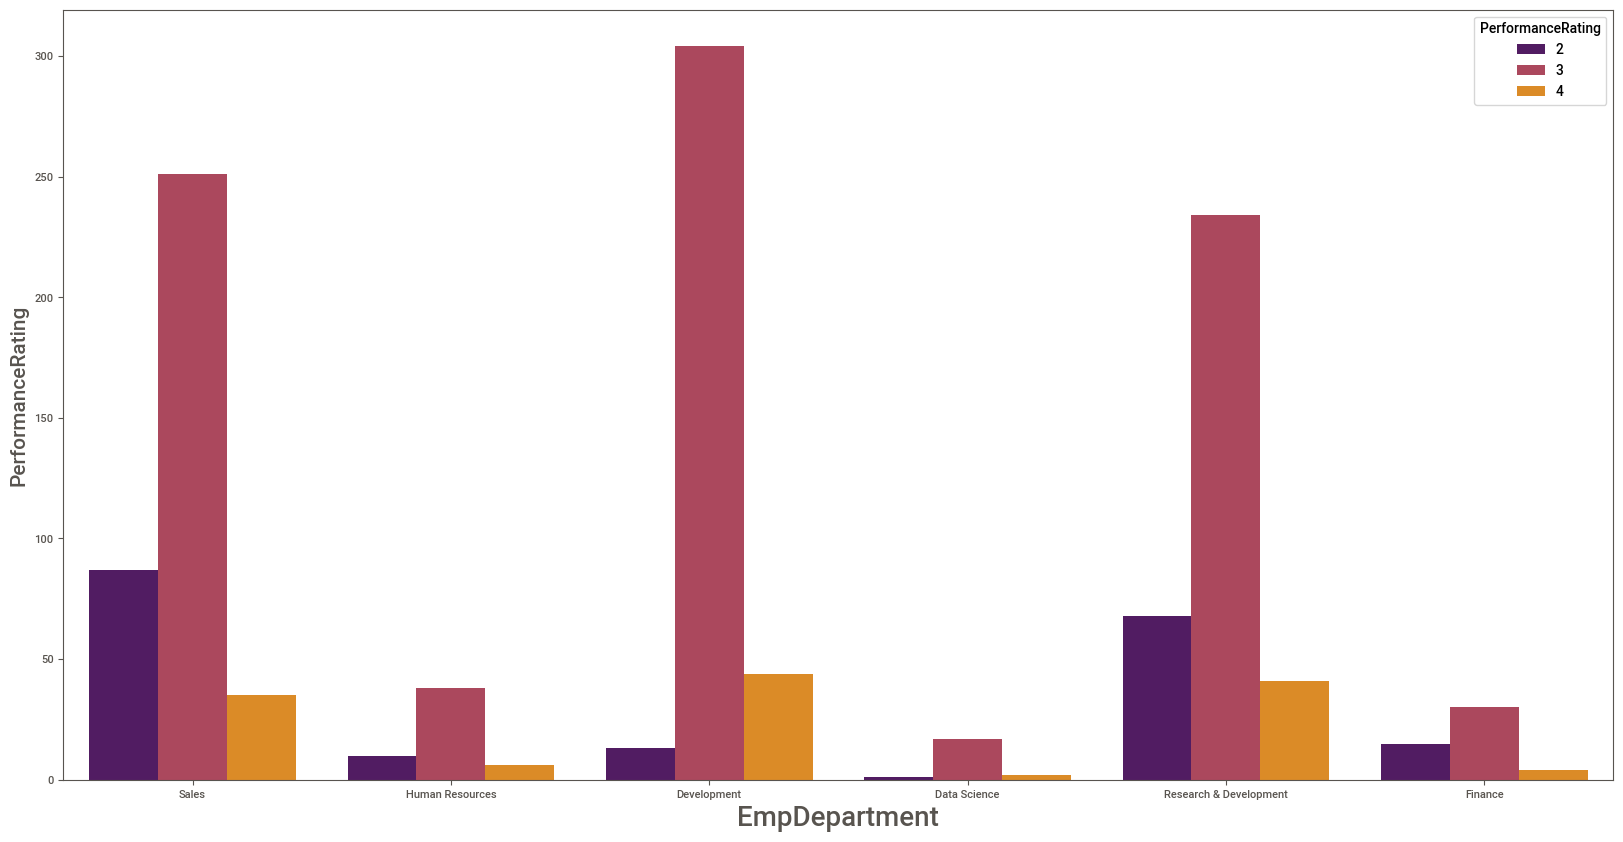

In [34]:
plt.figure(figsize=(20,10))
sns.countplot('EmpDepartment',hue=data.PerformanceRating,data=data,palette='inferno')
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()

#### Observation
- The majority of employees in the Development, Sales, and Research & Development departments have a performance rating of 3 
- However, employees in the Data Science department tend to have lower performance ratings. 
- In the Sales and Research & Development departments, there are also instances where employees have a performance rating of 2.

### Gender Wise Evaluation

In [35]:
data.Gender.value_counts()

Male      725
Female    475
Name: Gender, dtype: int64

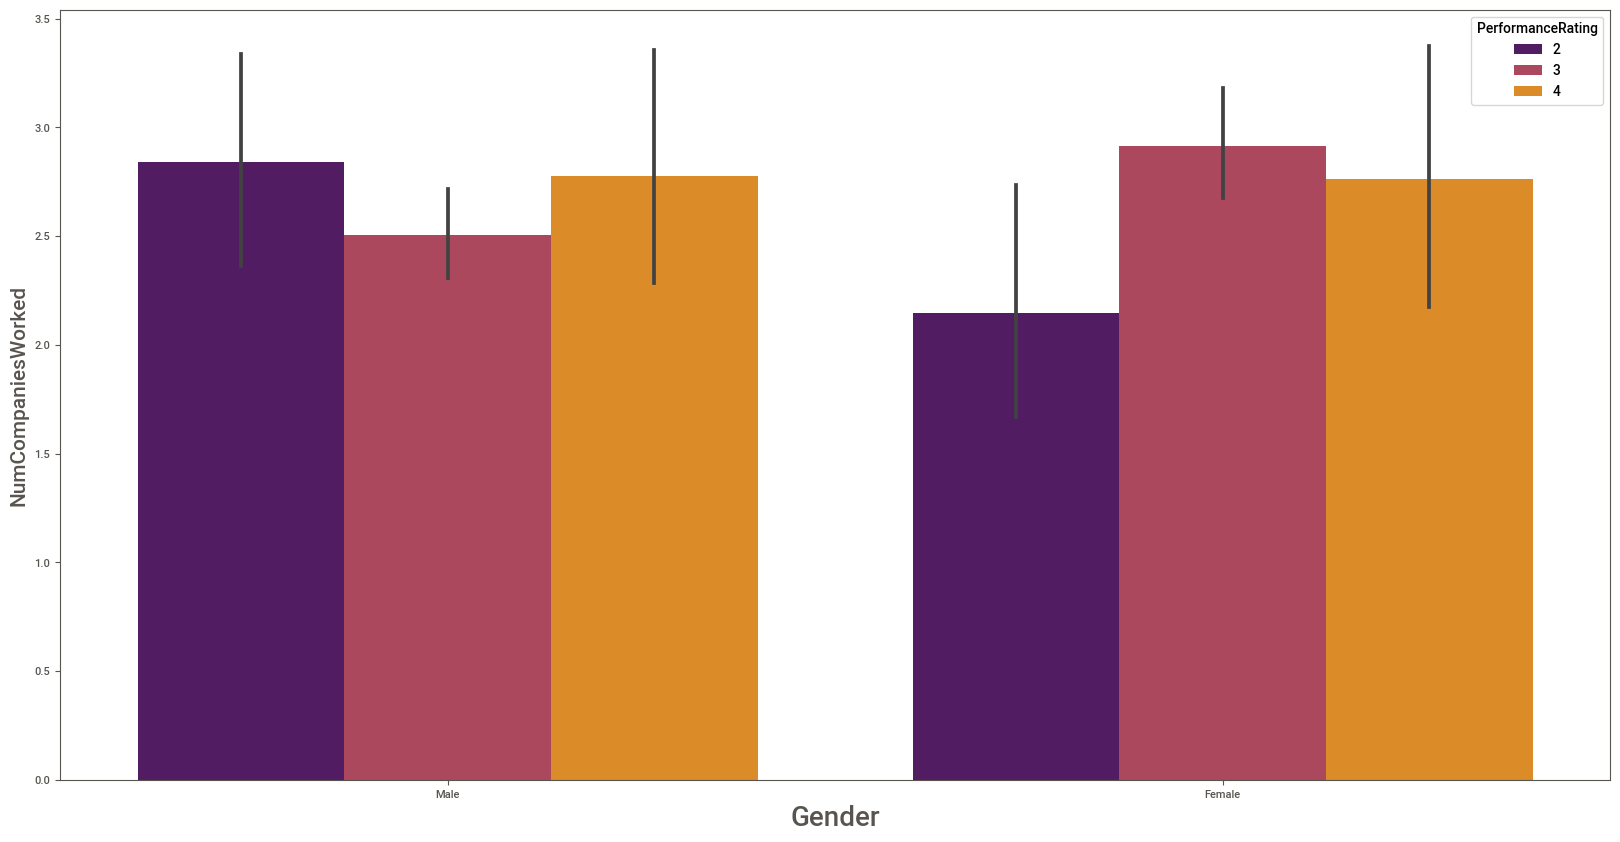

In [37]:
plt.figure(figsize=(20,10))
sns.barplot(x='Gender',y='NumCompaniesWorked',hue=data.PerformanceRating,data=data,palette='inferno')
plt.xlabel('Gender',fontsize=20)
plt.ylabel('NumCompaniesWorked',fontsize=15)
plt.show()

#### Relation between age and Exp years at this company

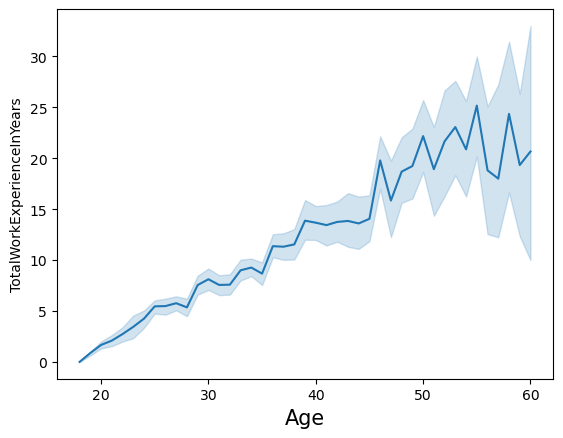

In [9]:
sns.lineplot(x='Age',y='TotalWorkExperienceInYears',data=data)
plt.xlabel('Age',fontsize=15)
plt.show()

- Age and work exp are directly proporational to eachother,i.e with age work exp also increases

#### Different columns relation with Performance Rating

In [10]:
categorical = []  # Create empty list to store the feature
for column in data.columns:
    if data[column].dtype == object:
        categorical.append(column)
        print(f"{column} : {data[column].unique()}")
        print("====================================")

EmpNumber : ['E1001000' 'E1001006' 'E1001007' ... 'E100994' 'E100995' 'E100998']
Gender : ['Male' 'Female']
EducationBackground : ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
MaritalStatus : ['Single' 'Married' 'Divorced']
EmpDepartment : ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
EmpJobRole : ['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']
BusinessTravelFrequency : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
OverTime : ['No' 'Yes']
Attrition : ['No' 'Yes']


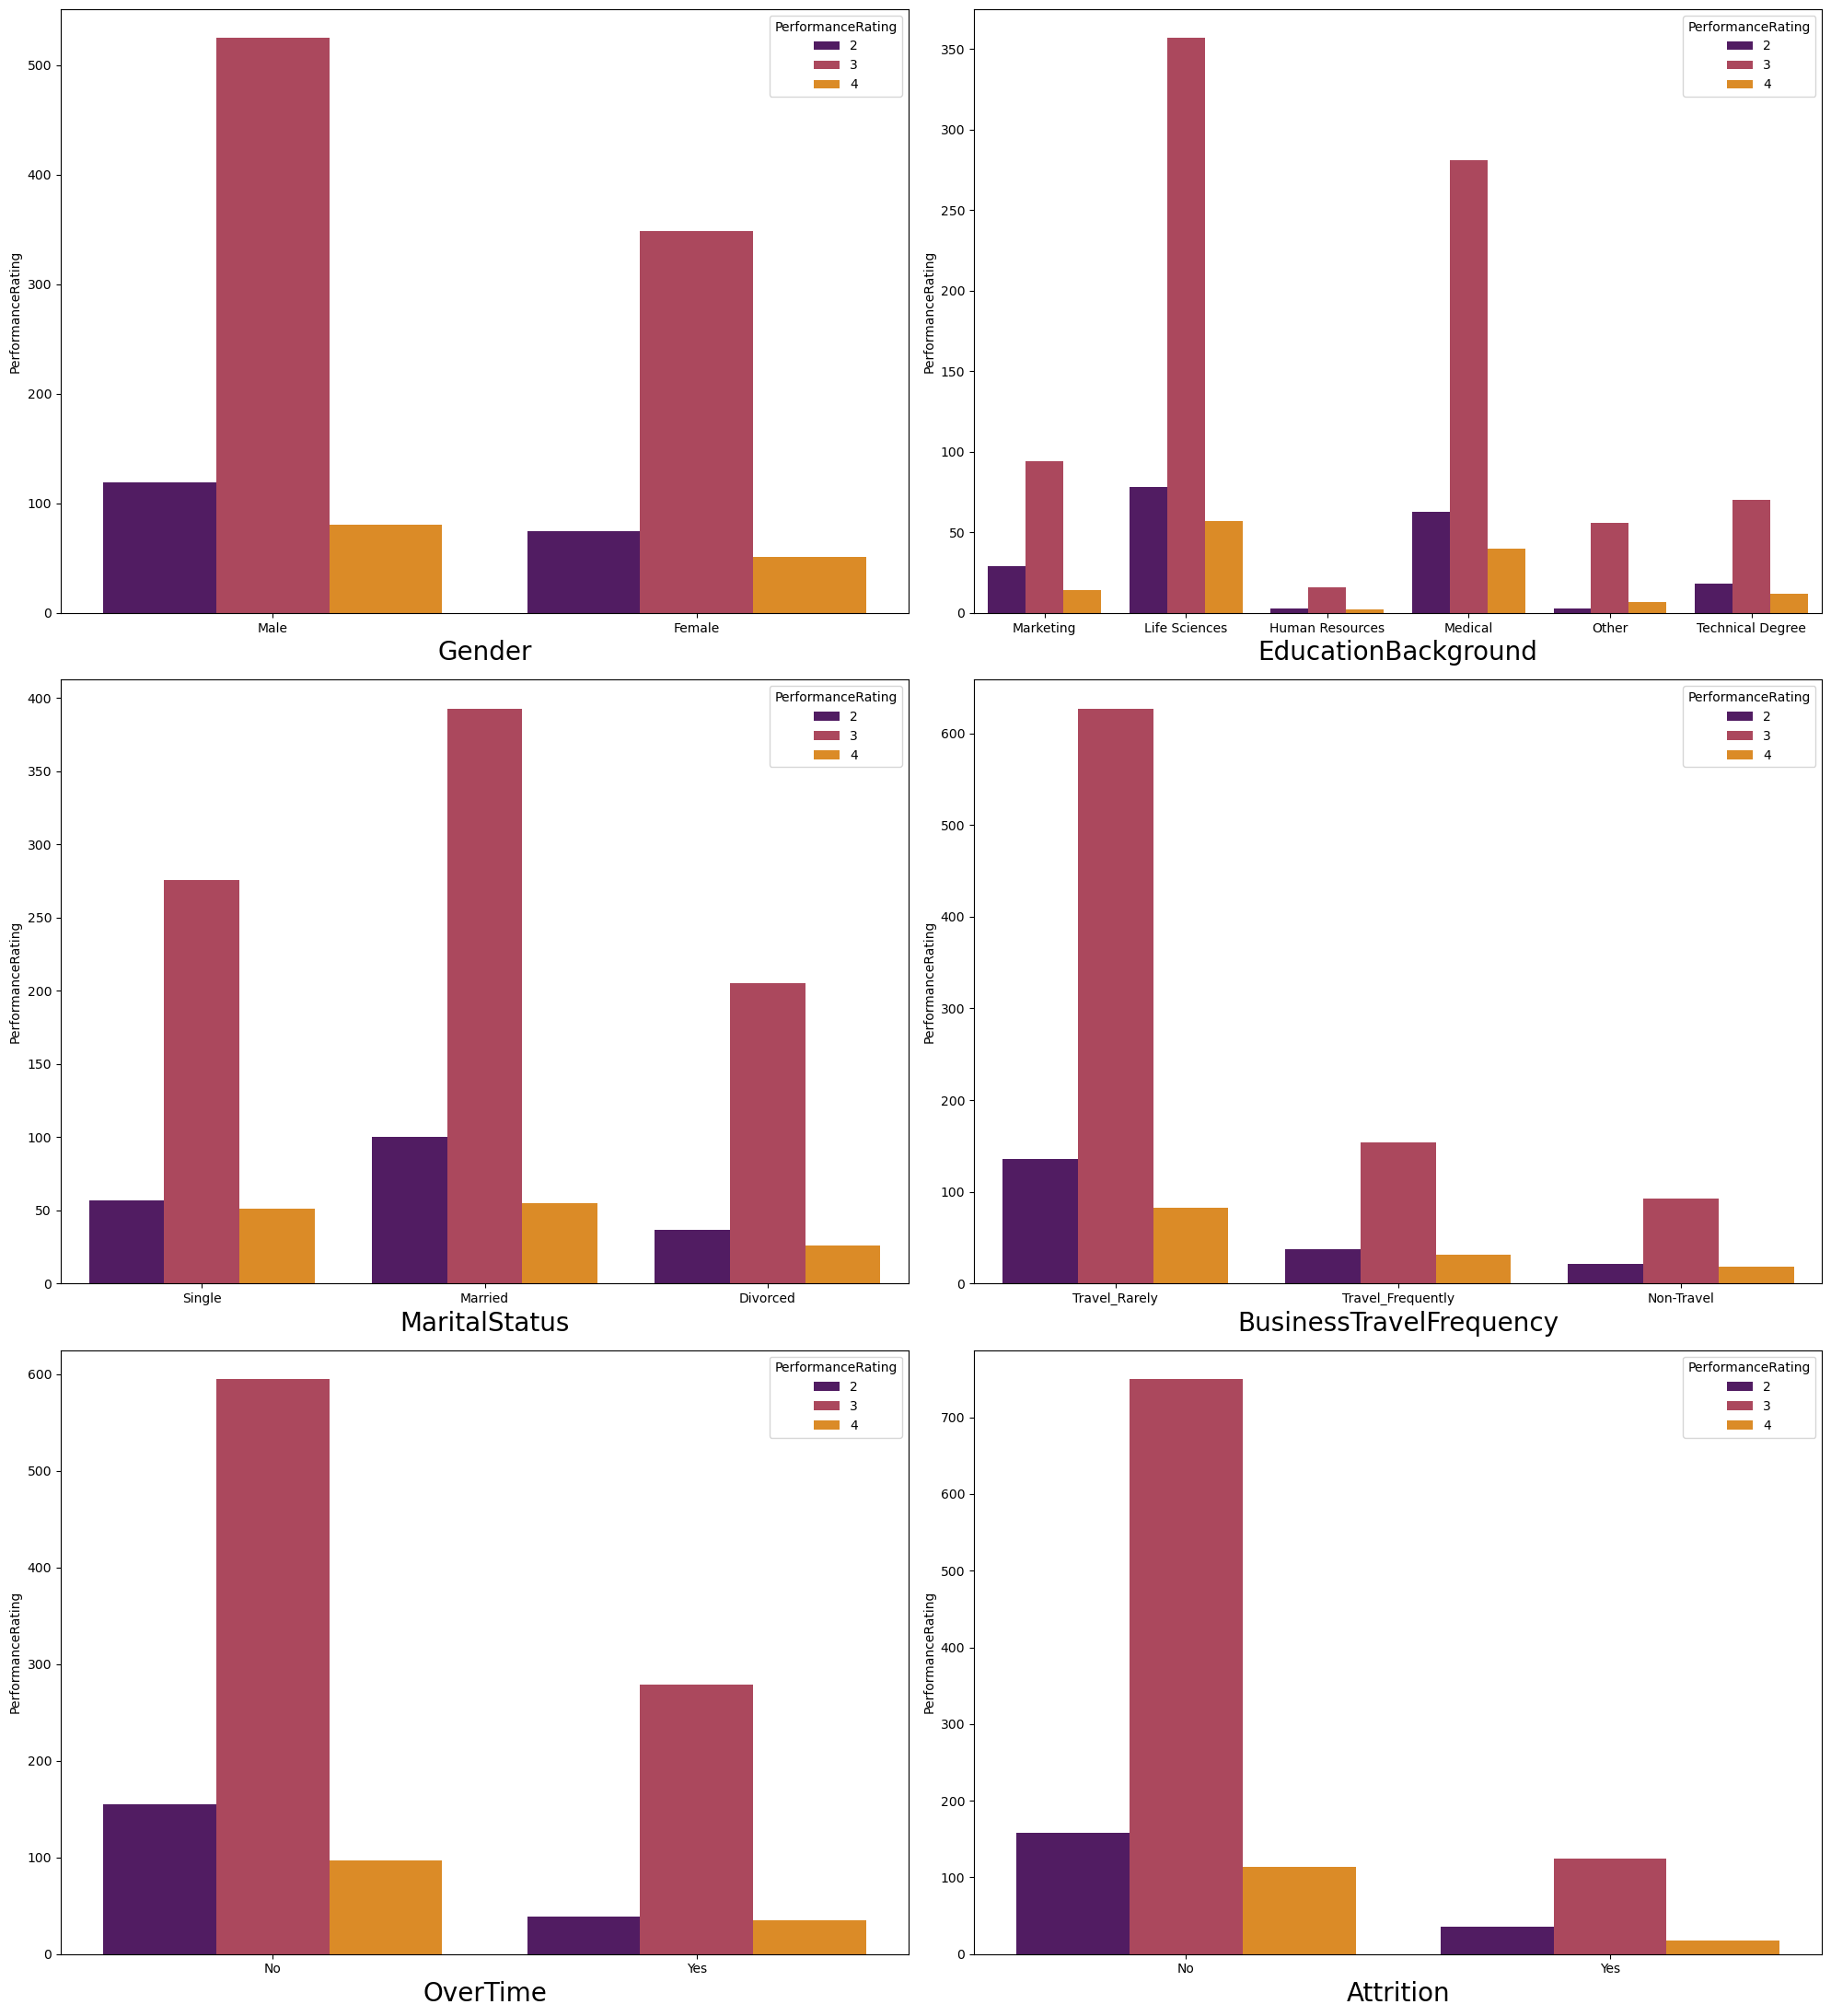

In [13]:
# Make a list of categorical feature and use sub plot to plot multiple feature
categorical_col = data[['Gender','EducationBackground','MaritalStatus','BusinessTravelFrequency','OverTime','Attrition']]
plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in categorical_col: # iteration of columns / acessing the columns from count 
    if plotno<=7:    # set the limit
        plt.subplot(3,2,plotno) # # plotting 6 graphs (3-rows,2-columns) ,plotnumber is for count
        sns.countplot(x=categorical_col[column],hue=data.PerformanceRating,palette='inferno') # Plotting count plots because the feature is categorical
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
        plt.ylabel('PerformanceRating')
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

#### Gender and performance rating
- Highest rating of males and females is 3

#### Educationbackground and  performance rating
- Life Sciences and medical education background have a maximum performance rating of 3

#### Marital Status and performance rating
- Single, Married and divorced prople have a maximum performance rating of 3

#### Business Travel frequency and performance rating
- People who travel rarely, frequently or who dont travel have a performance rating of 3

#### Overtime and performance rating
- People who work and dont work overtime have a performance rating of 3

#### Attrition and performance rating
- People who dont have an attrition have a performace rating of 3


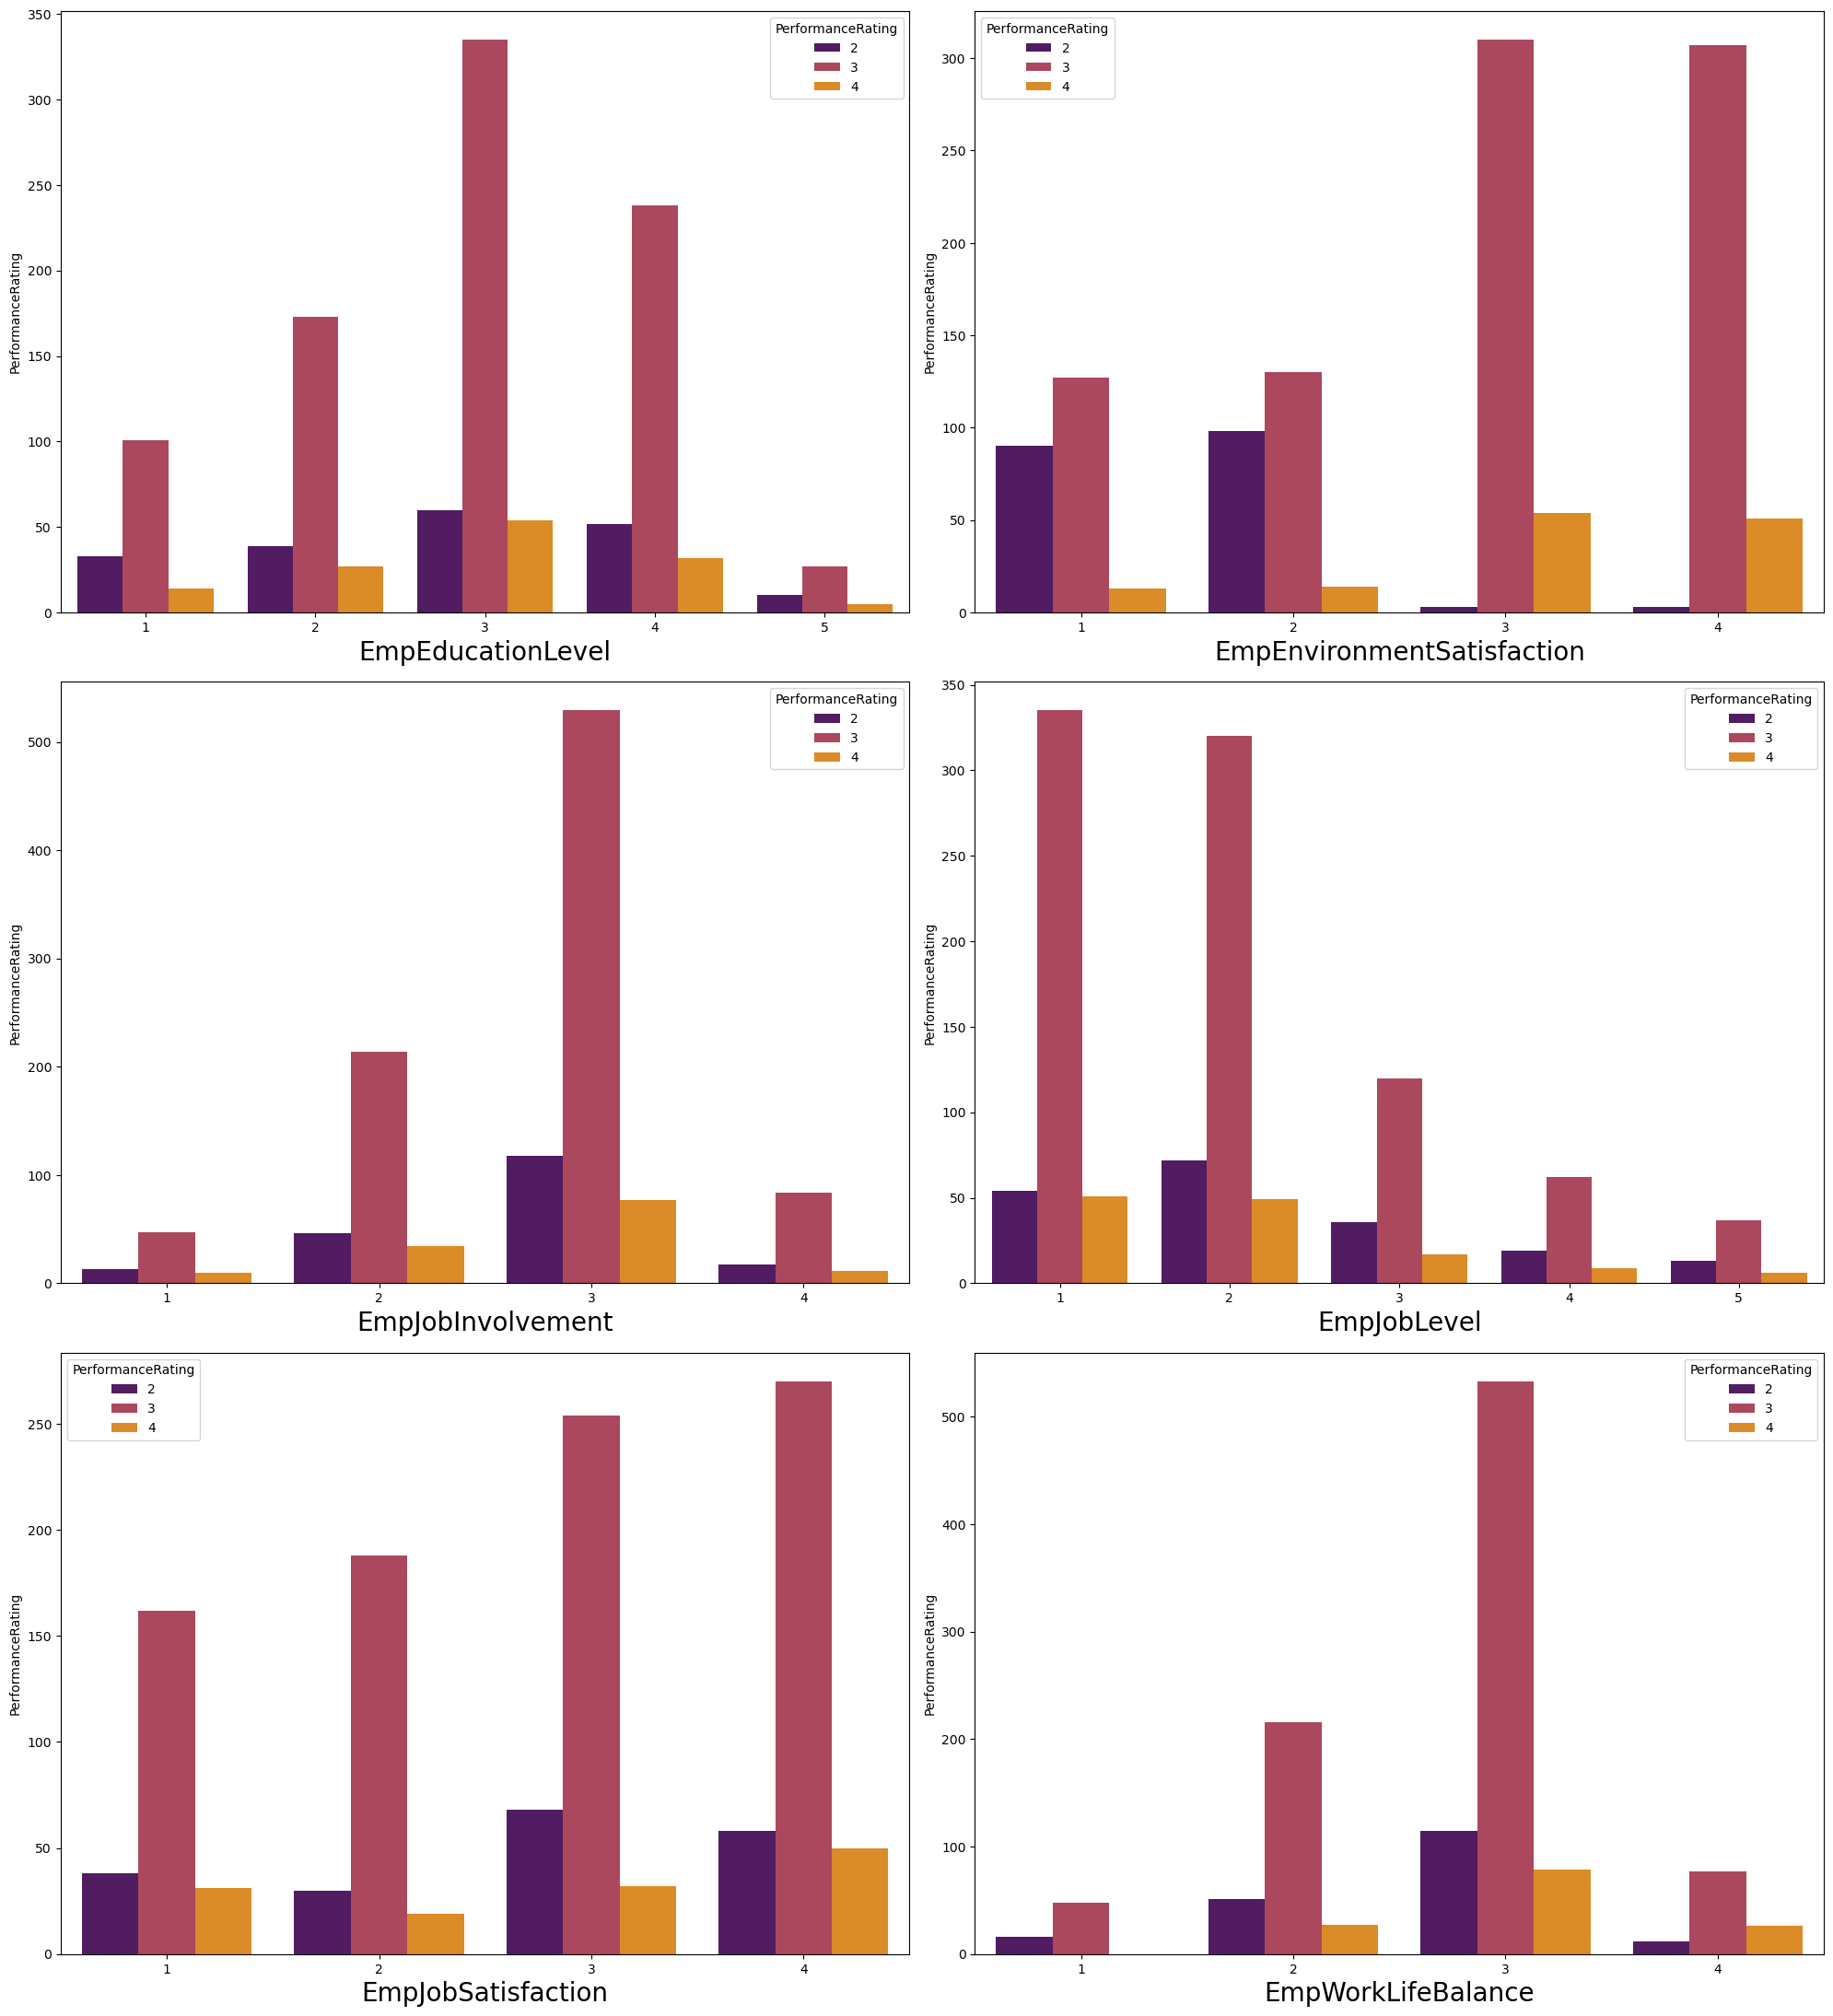

In [16]:
numerical = data[['EmpEducationLevel','EmpEnvironmentSatisfaction','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction',
                 'EmpWorkLifeBalance']]

plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in numerical: # iteration of columns / acessing the columns from count 
    if plotno<=7:    # set the limit
        plt.subplot(3,2,plotno) # # plotting 6 graphs (3-rows,2-columns) ,plotnumber is for count
        sns.countplot(x=numerical[column],hue=data.PerformanceRating,palette='inferno') # Plotting count plots because the feature is categorical
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
        plt.ylabel('PerformanceRating')
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

#### Emp education level and performance rating
- Max People have an Performance rating of 3 with an empeducationlevel of 2,3,4

#### EmpEnvironmentSatisfaction and performance rating
- The majority of employees have an environment satisfaction rating of 3 or 4, and these employees tend to have a performance rating of 3.
- On the other hand, when employees have an environment satisfaction rating of 1 or 2, the maximum number of employees tend to have a performance rating of 2. 
- It appears that as the environment satisfaction rating increases, the occurrence of employees with a performance rating of 4 also increases.

#### EmpJobInvolvement and performance rating
- Employees with job involvement ratings of 2 and 3 tend to have a performance rating of 3 more frequently. 
- On the other hand, employees with job involvement ratings of 2 and 4 have a lower occurrence of performance rating 2 or 4 across all job involvement levels.

####  EmpJobLevel and performance rating
- For employees with job levels 1, 2, and 3, the majority of them have a performance rating of 3. 
- However, across all job levels, employees have a lower occurrence of performance rating 2 and 4, with less than 60% of employees having these ratings.

#### Relationship between EmpJobSatisfaction and performance rating
- Employees with a job satisfaction level of 4 or 3 tend to receive a performance rating of 3 most of the time.
- However, across all job satisfaction levels, employees with performance ratings of 2 and 4 constitute less than 55% of the total employees.

#### EmpWorkLifeBalance and performance rating
- When employees have a work-life balance rating of 3, the majority of them tend to receive a performance rating of 3.
- However, when the work-life balance rating is 1, none of the employees receive a performance rating of 4.

### TOP 3 FACTOR AFFECTING TO THE EMPLOYEE PERFORMANCE
#### From visualisation file we get the top 3 factor affecting to the employee performance

- Emp Environment Satisfaction
- Emp Last Salary Hike Percent
- Emp Work Life Balance

In [ ]:
# Emp Environment Satisfaction
plt.figure(figsize=(20,10))
plt.title("preformance rating in Employee Environment Satisfaction",fontsize=18)
plt.pie([90,127,13,98,130,14,3,310,54,3,307,51], radius=1,
        colors=["mediumaquamarine","mediumseagreen","seagreen",
                "skyblue","lightskyblue",'lightblue',
                'turquoise','turquoise','mediumturquoise',
                'c','skyblue','c',
               ],explode =[0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01],
        labels=[2,3,4,2,3,4,2,3,4,2,3,4],rotatelabels=True,
        pctdistance=0.82, textprops = {"fontsize":12,"fontweight":"bold"},startangle=92,
        wedgeprops=dict(width=0.6, edgecolor='w',linewidth=3))

plt.pie([230,242,367,361], radius=0.7,
        colors=['lightseagreen','deepskyblue',"darkturquoise","c"],
        wedgeprops=dict(width=0.3, edgecolor='w',linewidth=2),textprops = {"fontsize":12,"fontweight":"bold"},
        autopct='%.1f%%',
        labels=[1,2,3,4],
        pctdistance=0.70, labeldistance=0.4, rotatelabels=True,startangle=92)
plt.show()

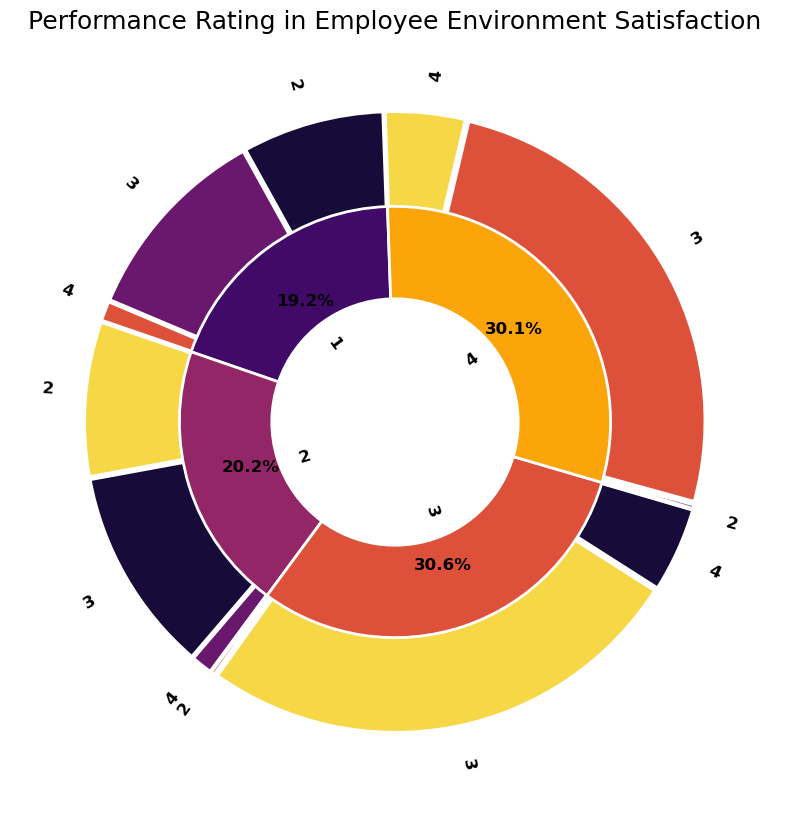

In [18]:
# Emp Environment Satisfaction


plt.figure(figsize=(20, 10))
plt.title("Performance Rating in Employee Environment Satisfaction", fontsize=18)

# Pie chart for Performance Rating
performance_rating_colors = plt.cm.inferno([0.1, 0.3, 0.6, 0.9])
performance_rating_explode = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
performance_rating_labels = [2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4]
performance_rating_counts = [90, 127, 13, 98, 130, 14, 3, 310, 54, 3, 307, 51]

plt.pie(performance_rating_counts, radius=1, explode=performance_rating_explode,
        colors=performance_rating_colors, labels=performance_rating_labels,
        rotatelabels=True, pctdistance=0.82, textprops={"fontsize": 12, "fontweight": "bold"},
        startangle=92, wedgeprops=dict(width=0.6, edgecolor='w', linewidth=3))

# Pie chart for Employee Environment Satisfaction
satisfaction_colors = plt.cm.inferno([0.2, 0.4, 0.6, 0.8])
satisfaction_counts = [230, 242, 367, 361]
satisfaction_labels = [1, 2, 3, 4]

plt.pie(satisfaction_counts, radius=0.7,
        colors=satisfaction_colors,
        wedgeprops=dict(width=0.3, edgecolor='w', linewidth=2),
        textprops={"fontsize": 12, "fontweight": "bold"},
        autopct='%.1f%%',
        labels=satisfaction_labels,
        pctdistance=0.70, labeldistance=0.4, rotatelabels=True, startangle=92)

plt.show()



- The majority of employees, specifically 367 and 361 employees, have a performance rating that corresponds to an Employee Environment Satisfaction level of 3 and 4, respectively.

In [4]:
# 2.Employee last salary hike percent
pd.crosstab(data['EmpLastSalaryHikePercent'],data['PerformanceRating'],margins=True)


PerformanceRating           2    3    4   All
EmpLastSalaryHikePercent                     
11                         28  140    1   169
12                         30  123    2   155
13                         27  138    3   168
14                         28  140    4   172
15                         11   67    4    82
16                         12   54    2    68
17                          9   55    3    67
18                         10   63    0    73
19                         10   51    2    63
20                          9   14   27    50
21                          4    6   24    34
22                          7   13   27    47
23                          4    2   15    21
24                          2    5   11    18
25                          3    3    7    13
All                       194  874  132  1200

- The majority of employees who received a salary hike percentage between 11-19% tend to have a performance rating of 2 and 3 most of the time. On the other hand, employees who received a salary hike percentage in the range of 20-22% typically have a performance rating of 4.

In [5]:
# 3.Employee Work life balance
pd.crosstab(data['EmpWorkLifeBalance'],data['PerformanceRating'],margins=True)

PerformanceRating     2    3    4   All
EmpWorkLifeBalance                     
1                    16   48    0    64
2                    51  216   27   294
3                   115  533   79   727
4                    12   77   26   115
All                 194  874  132  1200

- Employees with a work-life balance level of 3 tend to have a high performance rating.

### ------------------------------------------------------------------------------------------------

## Data Preprocessing

### Converting categorical data

#### GENDER

In [5]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

data.Gender=lc.fit_transform(data.Gender)

In [6]:
data.head(2)

EmpNumber  Age  Gender EducationBackground MaritalStatus EmpDepartment  \
0  E1001000   32       1           Marketing        Single         Sales   
1  E1001006   47       1           Marketing        Single         Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   

   EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
0                  3                           4             55   
1                  4                           4             42   

   EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
0                  3            2                   4                   1   
1                  3            2                   1                   2   

  OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0       No                        12                            4   
1       No                        12                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   

   YearsSinceLastPromotion  YearsWithCurrManager Attrition  PerformanceRating  
0                        0                     8        No                  3  
1                        1                     7        No                  3

#### EDUCATION BACKGROUND

In [7]:
data.EducationBackground.value_counts()

Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: EducationBackground, dtype: int64

In [8]:
data.EducationBackground=data.EducationBackground.map({'Life Sciences':1,'Medical':2, 'Marketing':3, 'Technical Degree':4, 'Other':5, 'Human Resources':6})

In [9]:
data.head(5)

EmpNumber  Age  Gender  EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32       1                    3        Single            Sales   
1  E1001006   47       1                    3        Single            Sales   
2  E1001007   40       1                    1       Married            Sales   
3  E1001009   41       1                    6      Divorced  Human Resources   
4  E1001010   60       1                    3        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
0                  3                           4             55   
1                  4                           4             42   
2                  4                           4             48   
3                  4                           2             73   
4                  4                           1             84   

   EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
0                  3            2                   4                   1   
1                  3            2                   1                   2   
2                  2            3                   1                   5   
3                  2            5                   4                   3   
4                  3            2                   1                   8   

  OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0       No                        12                            4   
1       No                        12                            4   
2      Yes                        21                            3   
3       No                        15                            2   
4       No                        14                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

   YearsSinceLastPromotion  YearsWithCurrManager Attrition  PerformanceRating  
0                        0                     8        No                  3  
1                        1                     7        No                  3  
2                        1                    12        No                  4  
3                       12                     6        No                  3  
4                        2                     2        No                  3

#### MARITAL STATUS

In [10]:
data.MaritalStatus.value_counts()

Married     548
Single      384
Divorced    268
Name: MaritalStatus, dtype: int64

In [11]:
data.MaritalStatus=data.MaritalStatus.map({'Married':1,'Single':2, 'Divorced':3})

In [12]:
data.head(5)

EmpNumber  Age  Gender  EducationBackground  MaritalStatus    EmpDepartment  \
0  E1001000   32       1                    3              2            Sales   
1  E1001006   47       1                    3              2            Sales   
2  E1001007   40       1                    1              1            Sales   
3  E1001009   41       1                    6              3  Human Resources   
4  E1001010   60       1                    3              2            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
0                  3                           4             55   
1                  4                           4             42   
2                  4                           4             48   
3                  4                           2             73   
4                  4                           1             84   

   EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
0                  3            2                   4                   1   
1                  3            2                   1                   2   
2                  2            3                   1                   5   
3                  2            5                   4                   3   
4                  3            2                   1                   8   

  OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0       No                        12                            4   
1       No                        12                            4   
2      Yes                        21                            3   
3       No                        15                            2   
4       No                        14                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

   YearsSinceLastPromotion  YearsWithCurrManager Attrition  PerformanceRating  
0                        0                     8        No                  3  
1                        1                     7        No                  3  
2                        1                    12        No                  4  
3                       12                     6        No                  3  
4                        2                     2        No                  3

#### EMPDEPARTMENT

In [13]:
data.EmpDepartment.value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

In [14]:
data.EmpDepartment=lc.fit_transform(data.EmpDepartment)

In [15]:
data.head(5)

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0  E1001000   32       1                    3              2              5   
1  E1001006   47       1                    3              2              5   
2  E1001007   40       1                    1              1              5   
3  E1001009   41       1                    6              3              3   
4  E1001010   60       1                    3              2              5   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
0                  3                           4             55   
1                  4                           4             42   
2                  4                           4             48   
3                  4                           2             73   
4                  4                           1             84   

   EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
0                  3            2                   4                   1   
1                  3            2                   1                   2   
2                  2            3                   1                   5   
3                  2            5                   4                   3   
4                  3            2                   1                   8   

  OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0       No                        12                            4   
1       No                        12                            4   
2      Yes                        21                            3   
3       No                        15                            2   
4       No                        14                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

   YearsSinceLastPromotion  YearsWithCurrManager Attrition  PerformanceRating  
0                        0                     8        No                  3  
1                        1                     7        No                  3  
2                        1                    12        No                  4  
3                       12                     6        No                  3  
4                        2                     2        No                  3

#### EMPJOBROLE

In [16]:
data.EmpJobRole.value_counts()

Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
Data Scientist                20
Research Director             19
Business Analyst              16
Senior Manager R&D            15
Delivery Manager              12
Technical Architect            7
Name: EmpJobRole, dtype: int64

In [17]:
data.EmpJobRole=lc.fit_transform(data.EmpJobRole)

In [55]:
data.head(2)

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0  E1001000   32       1                    3              2              5   
1  E1001006   47       1                    3              2              5   

   EmpJobRole BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0          13           Travel_Rarely                10                  3   
1          13           Travel_Rarely                14                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                           4             55                  3            2   
1                           4             42                  3            2   

   EmpJobSatisfaction  NumCompaniesWorked OverTime  EmpLastSalaryHikePercent  \
0                   4                   1       No                        12   
1                   1                   2       No                        12   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                          10   
1                            4                          20   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   

   YearsWithCurrManager Attrition  PerformanceRating  
0                     8        No                  3  
1                     7        No                  3

#### BUSINESSTRAVELFREQUENCY

In [18]:
data.BusinessTravelFrequency.value_counts()

Travel_Rarely        846
Travel_Frequently    222
Non-Travel           132
Name: BusinessTravelFrequency, dtype: int64

In [19]:
data.BusinessTravelFrequency=data.BusinessTravelFrequency.map({'Travel_Rarely':1, 'Travel_Frequently':2, 'Non-Travel':3})

In [20]:
data.head(2)

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0  E1001000   32       1                    3              2              5   
1  E1001006   47       1                    3              2              5   

   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0          13                        1                10                  3   
1          13                        1                14                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                           4             55                  3            2   
1                           4             42                  3            2   

   EmpJobSatisfaction  NumCompaniesWorked OverTime  EmpLastSalaryHikePercent  \
0                   4                   1       No                        12   
1                   1                   2       No                        12   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                          10   
1                            4                          20   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   

   YearsWithCurrManager Attrition  PerformanceRating  
0                     8        No                  3  
1                     7        No                  3

#### OVER TIME

In [21]:
df1=pd.get_dummies(data['OverTime'],prefix='OverTime',drop_first=True)
data=pd.concat([data,df1],axis=1).drop(['OverTime'],axis=1)

In [22]:
data.head(2)

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0  E1001000   32       1                    3              2              5   
1  E1001006   47       1                    3              2              5   

   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0          13                        1                10                  3   
1          13                        1                14                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                           4             55                  3            2   
1                           4             42                  3            2   

   EmpJobSatisfaction  NumCompaniesWorked  EmpLastSalaryHikePercent  \
0                   4                   1                        12   
1                   1                   2                        12   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                          10   
1                            4                          20   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   

   YearsWithCurrManager Attrition  PerformanceRating  OverTime_Yes  
0                     8        No                  3             0  
1                     7        No                  3             0

#### ATTRITION

In [23]:
df2=pd.get_dummies(data['Attrition'],prefix='Attrition',drop_first=True)
data=pd.concat([data,df2],axis=1).drop(['Attrition'],axis=1)

In [24]:
data.head(2)

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0  E1001000   32       1                    3              2              5   
1  E1001006   47       1                    3              2              5   

   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0          13                        1                10                  3   
1          13                        1                14                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                           4             55                  3            2   
1                           4             42                  3            2   

   EmpJobSatisfaction  NumCompaniesWorked  EmpLastSalaryHikePercent  \
0                   4                   1                        12   
1                   1                   2                        12   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                          10   
1                            4                          20   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   

   YearsWithCurrManager  PerformanceRating  OverTime_Yes  Attrition_Yes  
0                     8                  3             0              0  
1                     7                  3             0              0

### Techniques Used
- In our data preprocessing, we have applied different encoding techniques to convert categorical data into numerical data.
- One-hot encoding was primarily used for columns with two unique values, where each value was represented by a separate binary column. Mapping was employed for columns with three unique values, where each value was assigned a specific numerical mapping. 
- Label encoding, on the other hand, was utilized for columns with more than three unique values, where each value was encoded with a unique numerical label. 
- These encoding techniques were selected based on the number of unique values in each column to ensure an appropriate representation of the categorical data as numerical features.


### Checking for outliers

In [63]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent',
       'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears',
       'TrainingTimesLastYear', 'EmpWorkLifeBalance',
       'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating',
       'OverTime_Yes', 'Attrition_Yes'],
      dtype='object')

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sahir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sahir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sahir\anaconda3\lib\si

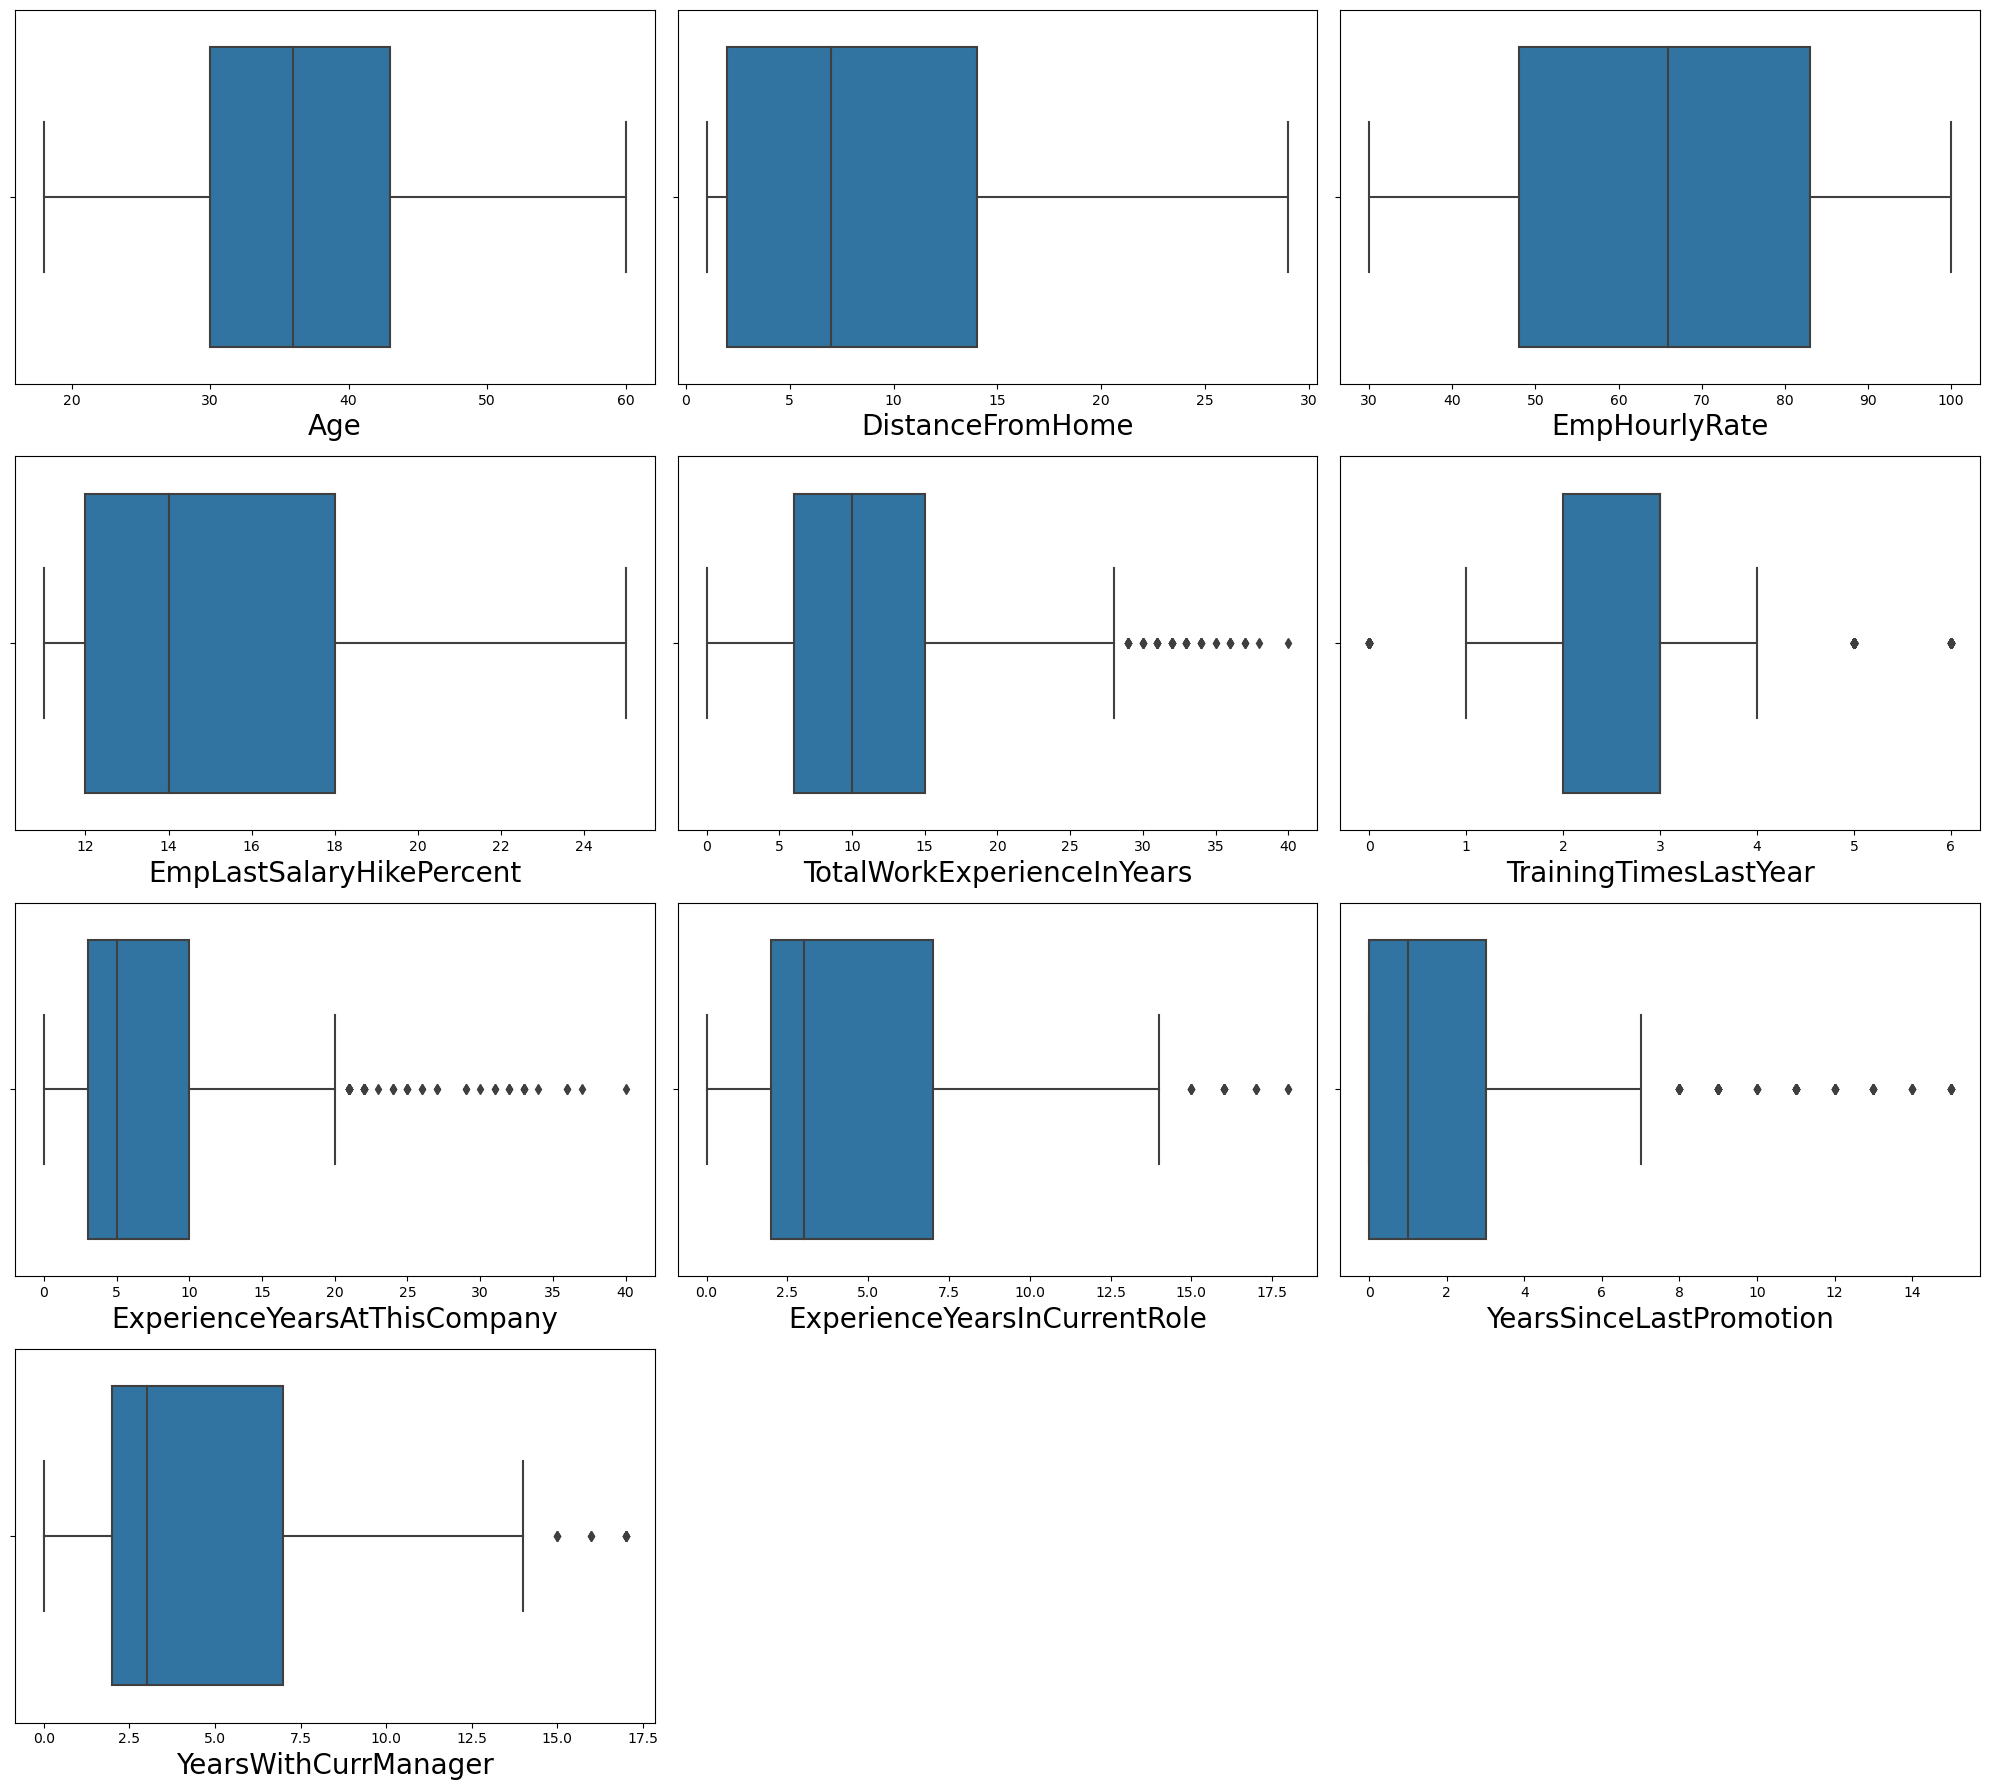

In [25]:
out = data[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent',
                   'TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
                   'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,18)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / acessing the columns from count 
    if plotno<=12:    # set the limit
        plt.subplot(4,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.boxplot(out[column]) # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalWorkExperienceInYears', ylabel='Density'>

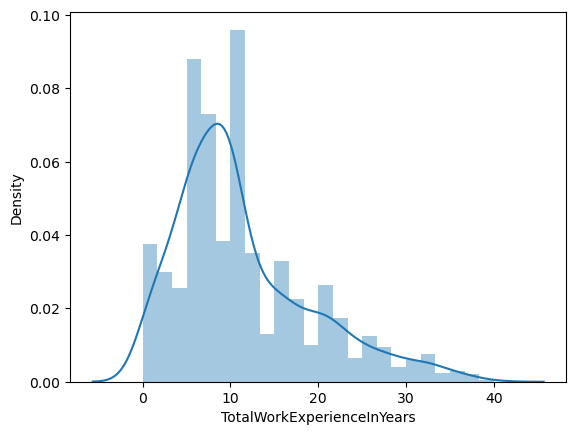

In [26]:
sns.distplot(data.TotalWorkExperienceInYears)

In [27]:
from scipy import stats

IQR=stats.iqr(data.TotalWorkExperienceInYears,interpolation='midpoint')
IQR

9.0

In [28]:
Q1=data.TotalWorkExperienceInYears.quantile(0.25)
Q3=data.TotalWorkExperienceInYears.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [29]:
data.loc[data['TotalWorkExperienceInYears']<min_limit]
data.loc[data['TotalWorkExperienceInYears']>max_limit]

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  \
17    E1001040   56       1                    2              1   
25    E1001054   52       1                    3              1   
48    E1001093   50       1                    2              1   
72    E1001129   51       0                    3              1   
77    E1001140   53       0                    3              1   
96    E1001179   53       0                    1              2   
100   E1001183   50       1                    1              3   
149   E1001275   50       1                    2              3   
173   E1001310   59       0                    1              2   
178   E1001316   52       0                    3              1   
192   E1001339   50       1                    2              1   
199   E1001352   55       1                    2              2   
277   E1001493   50       0                    2              1   
292   E1001523   54       0                    1              3   
295   E1001528   54       1                    1              1   
308   E1001556   55       1                    2              3   
312   E1001560   51       1                    1              3   
342   E1001616   56       1                    1              2   
347   E1001630   51       1                    1              3   
351   E1001638   58       0                    2              1   
356   E1001645   51       0                    4              2   
361   E1001651   56       1                    1              1   
387   E1001700   54       0                    2              2   
388   E1001701   58       0                    2              1   
424   E1001762   49       1                    1              3   
450   E1001817   50       1                    2              2   
471   E1001850   53       0                    4              1   
475   E1001856   55       1                    3              1   
490   E1001884   50       1                    2              1   
525   E1001939   49       0                    1              1   
528   E1001943   54       0                    2              1   
589   E1002048   55       1                    2              1   
615   E1002102   58       1                    2              3   
642   E1002145   48       1                    1              1   
678   E1002216   58       0                    1              1   
703   E1002251   55       1                    6              1   
777    E100301   53       0                    1              1   
816    E100358   50       0                    2              3   
845    E100409   58       1                    2              2   
867    E100443   58       0                    2              1   
921    E100537   52       1                    1              1   
958    E100601   50       0                    2              3   
962    E100607   52       1                    1              2   
989    E100652   55       1                    2              2   
1077   E100783   55       0                    1              2   
1101   E100824   52       0                    1              1   
1104   E100827   60       0                    1              1   
1116   E100846   57       1                    3              3   
1135   E100875   55       0                    1              2   
1156   E100916   49       1                    1              3   
1160   E100922   50       1                    2              1   

      EmpDepartment  EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
17                1           3                        1                 9   
25                5           8                        1                 3   
48                1           3                        1                 2   
72                5           8                        1                26   
77                5          13                        1                 7   
96                1           3                     

In [30]:
len(data.loc[data['TotalWorkExperienceInYears']<min_limit])

0

In [31]:
len(data.loc[data['TotalWorkExperienceInYears']>max_limit])

51

In [32]:
data.shape[0]
len(data.loc[data['TotalWorkExperienceInYears']>max_limit]) 
51/1200*100

4.25

In [33]:
data.loc[data['TotalWorkExperienceInYears']>max_limit,'TotalWorkExperienceInYears']=np.median(data.TotalWorkExperienceInYears)

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalWorkExperienceInYears'>

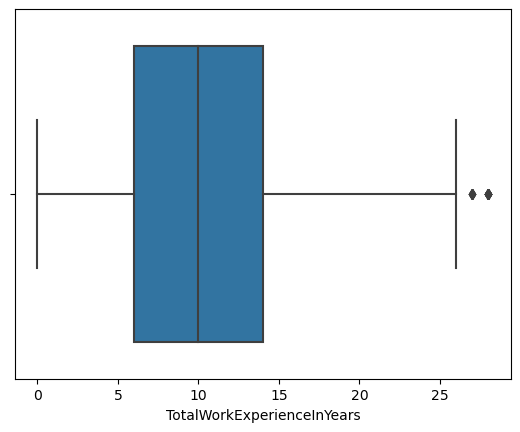

In [34]:
sns.boxplot(data.TotalWorkExperienceInYears)

In [80]:
out.columns


Index(['Age', 'DistanceFromHome', 'EmpHourlyRate', 'EmpLastSalaryHikePercent',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

#### TrainingTimesLastYear

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

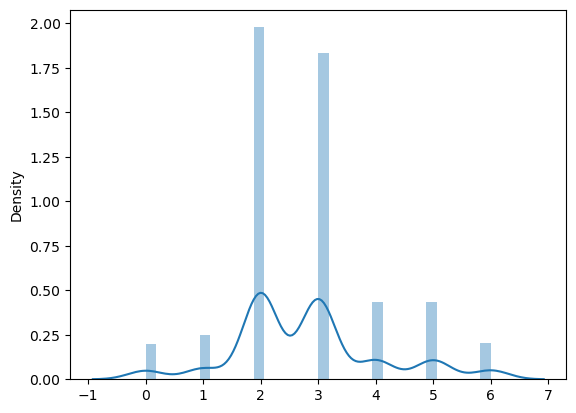

In [35]:
sns.distplot(x=data.TrainingTimesLastYear)

In [36]:
IQR=stats.iqr(data.TrainingTimesLastYear,interpolation='midpoint')
IQR

1.0

In [37]:
Q1=data.TrainingTimesLastYear.quantile(0.25)
Q3=data.TrainingTimesLastYear.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [38]:
data.loc[data['TrainingTimesLastYear']<min_limit]
data.loc[data['TrainingTimesLastYear']>max_limit]

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  \
10    E1001022   44       1                    2              2   
13    E1001027   29       1                    1              2   
27    E1001059   25       0                    2              2   
31    E1001064   34       1                    5              2   
59    E1001110   40       1                    2              2   
...        ...  ...     ...                  ...            ...   
1158   E100919   26       1                    3              1   
1166   E100933   27       0                    2              3   
1184   E100968   29       0                    2              1   
1188   E100979   20       1                    2              2   
1193   E100988   29       1                    1              3   

      EmpDepartment  EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
10                1           3                        3                24   
13                5          14                        1                10   
27                5          13                        1                26   
31                5          13                        1                 2   
59                1           3                        2                16   
...             ...         ...                      ...               ...   
1158              5          13                        1                28   
1166              1           3                        1                 6   
1184              5          13                        1                 3   
1188              1          15                        1                10   
1193              1           3                        2                 1   

      EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
10                    3                           1             49   
13                    3                           3             99   
27                    1                           3             32   
31                    3                           4             60   
59                    4                           1             51   
...                 ...                         ...            ...   
1158                  2                           1             66   
1166                  4                           1             66   
1184                  2                           2             62   
1188                  1                           4             32   
1193                  4                           2             76   

      EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
10                    1            1                   3                   2   
13                    3            1                   3                   1   
27                    3            2                   4                   1   
31                    3            2                   4                   1   
59                    2            2                   3                   6   
...                 ...          ...                 ...                 ...   
1158                  3            2                   2                   1   
1166                  2            1                   3                   0   
1184                  3            2                   3                   1   
1188                  3            1                   3                   1   
1193                  1            1                   4                   1   

      EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
10                          14                            3   
13                          11                            3   
27                          23                            2   
31                          22                            3   
59                          14                            4   
...                        ...                          ...   
1158                

In [39]:
len(data.loc[data['TrainingTimesLastYear']<min_limit])

44

In [40]:
data.shape

(1200, 28)

In [41]:
data.shape[0]
len(data.loc[data['TrainingTimesLastYear']<min_limit]) 
44/1200*100

3.6666666666666665

In [42]:
data.loc[data['TrainingTimesLastYear']<min_limit,'TrainingTimesLastYear']=np.median(data.TrainingTimesLastYear)

In [43]:
len(data.loc[data['TrainingTimesLastYear']>max_limit])

144

In [44]:
data.shape[0]
len(data.loc[data['TrainingTimesLastYear']>max_limit]) 
144/1200*100

12.0

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TrainingTimesLastYear'>

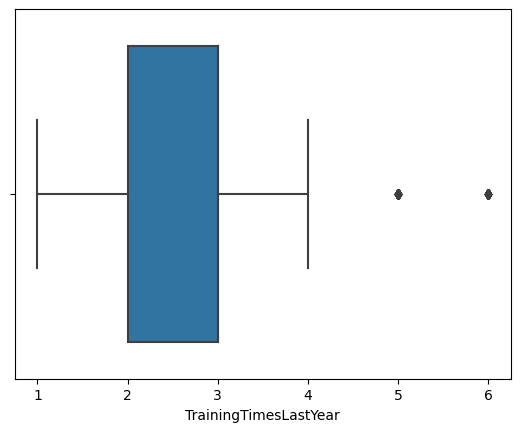

In [45]:
sns.boxplot(data.TrainingTimesLastYear)

#### ExperienceYearsAtThisCompany

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

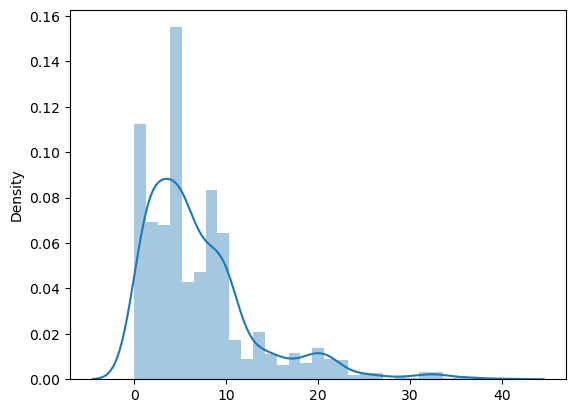

In [46]:
sns.distplot(x=data.ExperienceYearsAtThisCompany)

In [47]:
IQR=stats.iqr(data.ExperienceYearsAtThisCompany,interpolation='midpoint')
IQR

7.0

In [48]:
Q1=data.ExperienceYearsAtThisCompany.quantile(0.25)
Q3=data.ExperienceYearsAtThisCompany.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [49]:
data.loc[data['ExperienceYearsAtThisCompany']<min_limit]
data.loc[data['ExperienceYearsAtThisCompany']>max_limit]

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  \
3     E1001009   41       1                    6              3   
11    E1001024   47       0                    2              3   
25    E1001054   52       1                    3              1   
52    E1001098   47       0                    5              1   
100   E1001183   50       1                    1              3   
168   E1001304   39       0                    1              1   
175   E1001313   41       0                    1              3   
178   E1001316   52       0                    3              1   
181   E1001321   39       0                    2              2   
216   E1001387   42       1                    2              1   
252   E1001445   42       1                    1              2   
272   E1001482   46       0                    3              1   
304   E1001545   44       1                    3              1   
307   E1001555   45       0                    3              2   
308   E1001556   55       1                    2              3   
312   E1001560   51       1                    1              3   
316   E1001566   44       1                    1              3   
320   E1001571   43       0                    3              2   
347   E1001630   51       1                    1              3   
450   E1001817   50       1                    2              2   
459   E1001828   40       1                    2              2   
471   E1001850   53       0                    4              1   
475   E1001856   55       1                    3              1   
490   E1001884   50       1                    2              1   
492   E1001886   44       0                    2              3   
555   E1001990   45       1                    1              1   
557   E1001997   45       0                    4              2   
571   E1002018   40       1                    2              2   
613   E1002093   41       0                    3              3   
617   E1002105   47       0                    1              3   
642   E1002145   48       1                    1              1   
658   E1002178   48       0                    2              3   
777    E100301   53       0                    1              1   
785    E100314   44       0                    2              1   
816    E100358   50       0                    2              3   
817    E100359   59       0                    1              2   
838    E100397   40       1                    1              1   
845    E100409   58       1                    2              2   
862    E100436   43       1                    1              1   
867    E100443   58       0                    2              1   
911    E100522   46       0                    3              3   
921    E100537   52       1                    1              1   
956    E100597   42       1                    4              1   
962    E100607   52       1                    1              2   
978    E100630   40       1                    2              3   
989    E100652   55       1                    2              2   
1015   E100688   41       1                    1              2   
1024   E100703   45       1                    1              3   
1027   E100707   39       1                    2              1   
1036   E100722   39       1                    2              1   
1086   E100798   43       1                    1              3   
1094   E100809   39       1                    1              3   
1104   E100827   60       0                    1              1   
1117   E100847   50       1                    1              1   
1156   E100916   49       1                    1              3   
1160   E100922   50       1                    2              1   

      EmpDepartment  EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
3                 3           8                        1                10   
11                5          

In [50]:
len(data.loc[data['ExperienceYearsAtThisCompany']<min_limit])

0

In [51]:
len(data.loc[data['ExperienceYearsAtThisCompany']>max_limit])

56

In [52]:
data.shape[0]
len(data.loc[data['ExperienceYearsAtThisCompany']>max_limit]) 
56/1200*100

4.666666666666667

In [53]:
data.loc[data['ExperienceYearsAtThisCompany']>max_limit,'ExperienceYearsAtThisCompany']=np.median(data.ExperienceYearsAtThisCompany)

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ExperienceYearsAtThisCompany'>

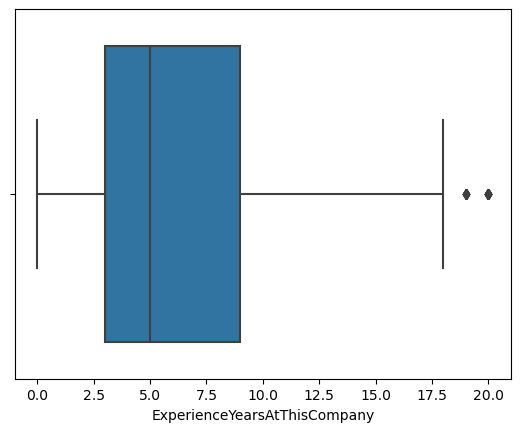

In [54]:
sns.boxplot(data.ExperienceYearsAtThisCompany)

#### ExperienceYearsInCurrentRole

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

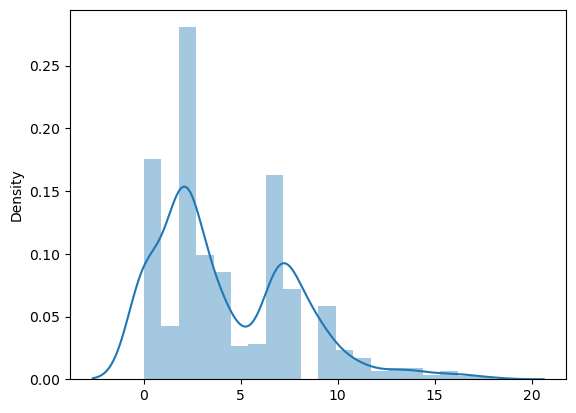

In [55]:
sns.distplot(x=data.ExperienceYearsInCurrentRole)

In [56]:
IQR=stats.iqr(data.ExperienceYearsInCurrentRole,interpolation='midpoint')
IQR

5.0

In [57]:
Q1=data.ExperienceYearsInCurrentRole.quantile(0.25)
Q3=data.ExperienceYearsInCurrentRole.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [58]:
data.loc[data['ExperienceYearsInCurrentRole']<min_limit]
data.loc[data['ExperienceYearsInCurrentRole']>max_limit]

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  \
151   E1001277   41       1                    2              3   
175   E1001313   41       0                    1              3   
272   E1001482   46       0                    3              1   
361   E1001651   56       1                    1              1   
501   E1001899   35       1                    1              1   
555   E1001990   45       1                    1              1   
639   E1002141   46       0                    4              3   
658   E1002178   48       0                    2              3   
730   E1002293   38       0                    2              1   
817    E100359   59       0                    1              2   
864    E100440   51       1                    1              2   
921    E100537   52       1                    1              1   
956    E100597   42       1                    4              1   
999    E100665   42       1                    1              1   
1109   E100836   40       0                    1              1   
1152   E100903   41       0                    1              1   

      EmpDepartment  EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
151               1           3                        2                 9   
175               4          11                        3                 7   
272               5           8                        1                 2   
361               4           9                        1                23   
501               2           4                        1                18   
555               4           9                        3                 1   
639               5          13                        1                 3   
658               4           8                        2                22   
730               4          11                        1                10   
817               5          13                        1                25   
864               1           3                        1                 6   
921               1           3                        1                 1   
956               1           3                        1                 4   
999               5          13                        1                 1   
1109              5           8                        1                 2   
1152              5           8                        1                 2   

      EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
151                   3                           1             64   
175                   1                           2             55   
272                   3                           3             69   
361                   3                           4             68   
501                   5                           2             48   
555                   1                           3             74   
639                   3                           1             45   
658                   3                           4             58   
730                   3                           2             99   
817                   3                           1             99   
864                   3                           1             51   
921                   4                           3             65   
956                   2                           3             58   
999                   1                           2             99   
1109                  4                           3             79   
1152                  5                           2             91   

      EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
151                   3            5                   3                   2   
175                   1            5                   3                   1   
272                   3            4                   1                   8   
361                   3    

In [59]:
len(data.loc[data['ExperienceYearsInCurrentRole']<min_limit])

0

In [60]:
len(data.loc[data['ExperienceYearsInCurrentRole']>max_limit])

16

In [61]:
data.shape[0]
len(data.loc[data['ExperienceYearsInCurrentRole']>max_limit]) 
16/1200*100

1.3333333333333335

In [62]:
data.loc[data['ExperienceYearsInCurrentRole']>max_limit,'ExperienceYearsInCurrentRole']=np.median(data.ExperienceYearsInCurrentRole)

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ExperienceYearsInCurrentRole'>

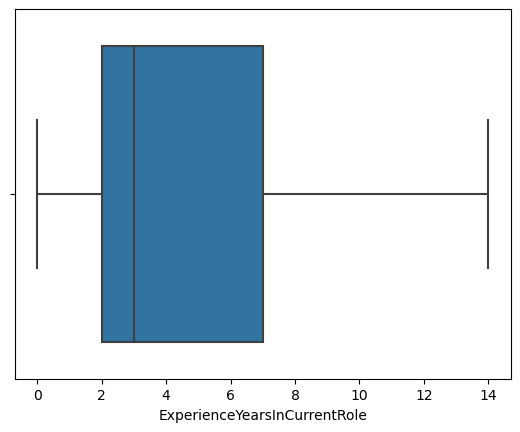

In [63]:
sns.boxplot(data.ExperienceYearsInCurrentRole)

#### YearsSinceLastPromotion

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

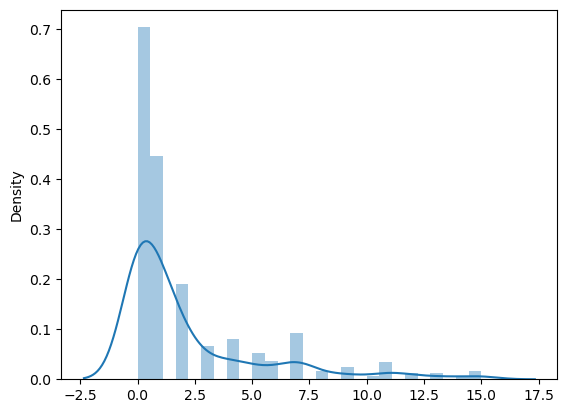

In [64]:
sns.distplot(x=data.YearsSinceLastPromotion)

In [65]:
IQR=stats.iqr(data.YearsSinceLastPromotion,interpolation='midpoint')
IQR

3.0

In [66]:
Q1=data.YearsSinceLastPromotion.quantile(0.25)
Q3=data.YearsSinceLastPromotion.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [67]:
data.loc[data['YearsSinceLastPromotion']<min_limit]
data.loc[data['YearsSinceLastPromotion']>max_limit]

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  \
3     E1001009   41       1                    6              3   
11    E1001024   47       0                    2              3   
100   E1001183   50       1                    1              3   
130   E1001239   31       0                    2              1   
132   E1001248   37       1                    1              1   
...        ...  ...     ...                  ...            ...   
1152   E100903   41       0                    1              1   
1160   E100922   50       1                    2              1   
1181   E100961   34       1                    1              1   
1185   E100969   35       1                    1              2   
1189   E100980   33       1                    1              2   

      EmpDepartment  EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
3                 3           8                        1                10   
11                5          13                        2                 3   
100               1           3                        3                 2   
130               1           3                        1                12   
132               5          13                        1                 1   
...             ...         ...                      ...               ...   
1152              5           8                        1                 2   
1160              3           8                        2                 3   
1181              1          15                        1                 1   
1185              1          15                        1                 6   
1189              1          15                        2                 3   

      EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
3                     4                           2             73   
11                    3                           4             49   
100                   4                           1             98   
130                   3                           4             41   
132                   4                           1             46   
...                 ...                         ...            ...   
1152                  5                           2             91   
1160                  3                           1             99   
1181                  5                           2             42   
1185                  4                           2             82   
1189                  3                           1             70   

      EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
3                     2            5                   4                   3   
11                    3            4                   3                   9   
100                   3            4                   1                   1   
130                   3            2                   4                   0   
132                   2            3                   3                   5   
...                 ...          ...                 ...                 ...   
1152                  3            4                   1                   7   
1160                  3            5                   2                   1   
1181                  3            1                   4                   1   
1185                  1            2                   4                   1   
1189                  3            1                   1                   1   

      EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
3                           15                            2   
11                          12                            4   
100                         11                            4   
130                         11                            3   
132                         11                            3   
...                        ...                          ...   
1152                

In [68]:
len(data.loc[data['YearsSinceLastPromotion']<min_limit])

0

In [69]:
len(data.loc[data['YearsSinceLastPromotion']>max_limit])

88

In [70]:
data.shape[0]
len(data.loc[data['YearsSinceLastPromotion']>max_limit]) 
88/1200*100

7.333333333333333

#### YearsWithCurrManager

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

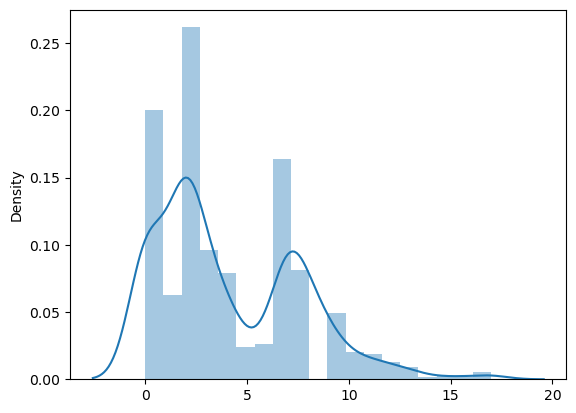

In [71]:
sns.distplot(x=data.YearsWithCurrManager)

In [72]:
IQR=stats.iqr(data.YearsWithCurrManager,interpolation='midpoint')
IQR

5.0

In [73]:
Q1=data.YearsWithCurrManager.quantile(0.25)
Q3=data.YearsWithCurrManager.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [74]:
data.loc[data['YearsWithCurrManager']<min_limit]
data.loc[data['YearsWithCurrManager']>max_limit]

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  \
25    E1001054   52       1                    3              1   
72    E1001129   51       0                    3              1   
126   E1001235   41       1                    2              2   
283   E1001503   44       1                    5              2   
320   E1001571   43       0                    3              2   
655   E1002170   40       1                    1              3   
785    E100314   44       0                    2              1   
864    E100440   51       1                    1              2   
888    E100484   45       1                    1              3   
956    E100597   42       1                    4              1   
1083   E100793   37       0                    1              3   

      EmpDepartment  EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
25                5           8                        1                 3   
72                5           8                        1                26   
126               1           3                        1                 6   
283               4          12                        1                29   
320               5          13                        1                 4   
655               4           9                        1                 1   
785               1           3                        1                 7   
864               1           3                        1                 6   
888               1           3                        1                 9   
956               1           3                        1                 4   
1083              1           2                        1                14   

      EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
25                    4                           3             31   
72                    4                           1             66   
126                   3                           4             59   
283                   4                           4             32   
320                   4                           4             56   
655                   4                           1             98   
785                   4                           1             42   
864                   3                           1             51   
888                   3                           2             60   
956                   2                           3             58   
1083                  3                           4             95   

      EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
25                    2            4                   1                   1   
72                    3            4                   3                   2   
126                   3            1                   1                   2   
283                   3            2                   4                   1   
320                   2            3                   4                   3   
655                   3            4                   1                   2   
785                   2            3                   4                   3   
864                   3            5                   3                   7   
888                   3            2                   2                   8   
956                   3            5                   4                   1   
1083                  3            1                   1                   1   

      EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
25                          11                            1   
72                          14                            3   
126                         13                            3   
283                         25                            2   
320                         14                            4   
655                         11                            1   
785                 

In [75]:
len(data.loc[data['YearsWithCurrManager']<min_limit])

0

In [76]:
len(data.loc[data['YearsWithCurrManager']>max_limit])

11

In [77]:
data.shape[0]
len(data.loc[data['YearsWithCurrManager']>max_limit]) 
11/1200*100

0.9166666666666666

In [78]:
data.loc[data['YearsWithCurrManager']>max_limit,'YearsWithCurrManager']=np.median(data.YearsWithCurrManager)

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsWithCurrManager'>

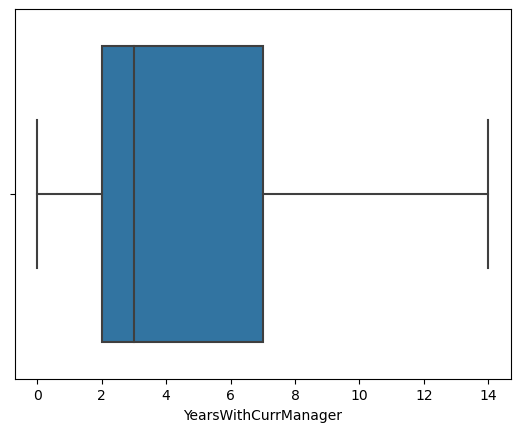

In [79]:
sns.boxplot(data.YearsWithCurrManager)

In [80]:
# saving the preprocessed data
data.to_csv('preprocessed_data.csv')

### Scaling the data

In [88]:
df=pd.read_csv('preprocessed_data.csv')
df

Unnamed: 0 EmpNumber  Age  Gender  EducationBackground  MaritalStatus  \
0              0  E1001000   32       1                    3              2   
1              1  E1001006   47       1                    3              2   
2              2  E1001007   40       1                    1              1   
3              3  E1001009   41       1                    6              3   
4              4  E1001010   60       1                    3              2   
...          ...       ...  ...     ...                  ...            ...   
1195        1195   E100992   27       0                    2              3   
1196        1196   E100993   37       1                    1              2   
1197        1197   E100994   50       1                    2              1   
1198        1198   E100995   34       0                    2              2   
1199        1199   E100998   24       0                    1              2   

      EmpDepartment  EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
0                 5          13                        1                10   
1                 5          13                        1                14   
2                 5          13                        2                 5   
3                 3           8                        1                10   
4                 5          13                        1                16   
...             ...         ...                      ...               ...   
1195              5          13                        2                 3   
1196              1          15                        1                10   
1197              1          15                        1                28   
1198              0           1                        1                 9   
1199              5          13                        1                 3   

      EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
0                     3                           4             55   
1                     4                           4             42   
2                     4                           4             48   
3                     4                           2             73   
4                     4                           1             84   
...                 ...                         ...            ...   
1195                  1                           4             71   
1196                  2                           4             80   
1197                  1                           4             74   
1198                  3                           4             46   
1199                  2                           1             65   

      EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
0                     3            2                   4                   1   
1                     3            2                   1                   2   
2                     2            3                   1                   5   
3                     2            5                   4                   3   
4                     3            2                   1                   8   
...                 ...          ...                 ...                 ...   
1195                  4            2                   4                   1   
1196                  4            1                   4                   3   
1197                  4            1                   3                   1   
1198                  2            3                   2                   1   
1199                  3            2                   3                   9   

      EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0                           12                            4   
1                           12                            4   
2                           21                            3   
3                           15                            2   
4  

In [97]:
df.drop(['Unnamed: 0', 'EmpNumber'], axis=1,inplace=True)


In [98]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler() 

df[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
      'TrainingTimesLastYear','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsWithCurrManager',
      'YearsSinceLastPromotion']]=scalar.fit_transform(df[['Age','DistanceFromHome','EmpHourlyRate',
      'EmpLastSalaryHikePercent','TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
      'ExperienceYearsInCurrentRole','YearsWithCurrManager','YearsSinceLastPromotion']])

### FEATURE SELECTION

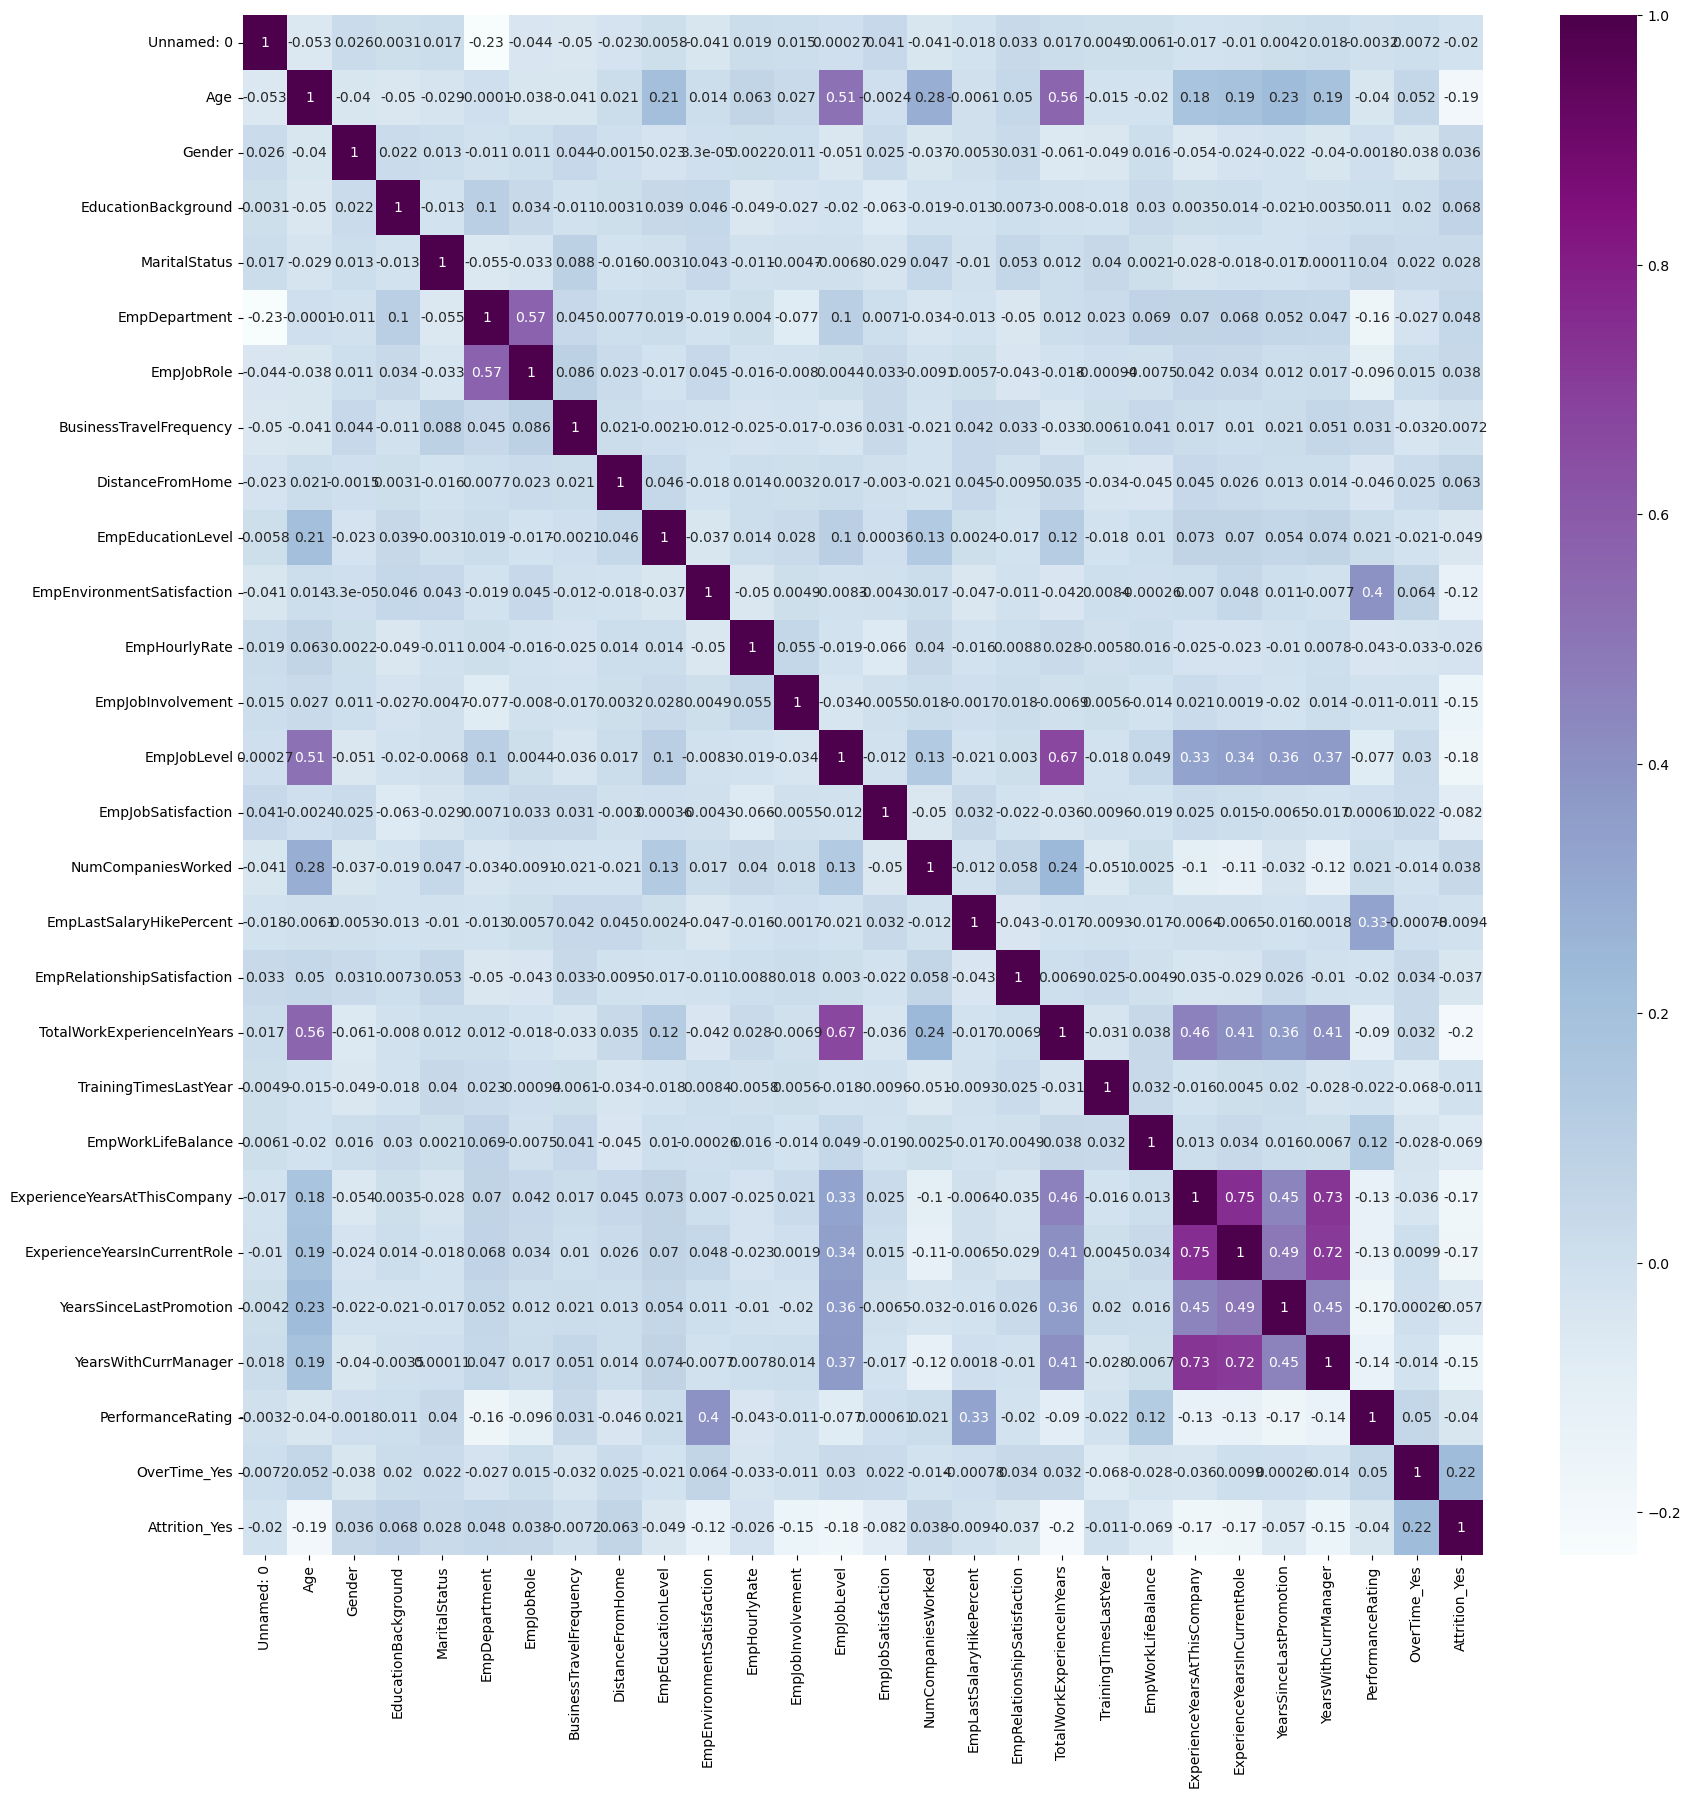

In [93]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='BuPu')
plt.show()


- There are no highly correlated features in data

In [99]:
df.head()

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0 -0.541458       1                    3              2              5   
1  1.109888       1                    3              2              5   
2  0.339260       1                    1              1              5   
3  0.449349       1                    6              3              3   
4  2.541054       1                    3              2              5   

   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0          13                        1          0.102061                  3   
1          13                        1          0.591464                  4   
2          13                        2         -0.509693                  4   
3           8                        1          0.102061                  4   
4          13                        1          0.836165                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                           4      -0.543569                  3            2   
1                           4      -1.187042                  3            2   
2                           4      -0.890055                  2            3   
3                           2       0.347393                  2            5   
4                           1       0.891870                  3            2   

   EmpJobSatisfaction  NumCompaniesWorked  EmpLastSalaryHikePercent  \
0                   4                   1                 -0.889111   
1                   1                   2                 -0.889111   
2                   1                   5                  1.594054   
3                   4                   3                 -0.061389   
4                   1                   8                 -0.337297   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                   -0.058535   
1                            4                    1.512870   
2                            3                    1.512870   
3                            2                    1.984292   
4                            4                   -0.058535   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0              -0.785703                   2                      0.868276   
1              -0.785703                   3                      0.200371   
2              -0.785703                   3                      2.649355   
3              -0.785703                   2                     -0.244898   
4              -1.662767                   3                     -0.912803   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                      0.864098                -0.681372   
1                      0.864098                -0.370834   
2                      2.661702                -0.370834   
3                      0.564498                 3.045084   
4                     -0.633905                -0.060296   

   YearsWithCurrManager  PerformanceRating  OverTime_Yes  Attrition_Yes  
0              1.202103                  3             0              0  
1              0.902825                  3             0              0  
2              2.399219                  4             1              0  
3              0.603546                  3             0              0  
4             -0.593570                  3             0              0

#### PCA (Principle Component Analysis)

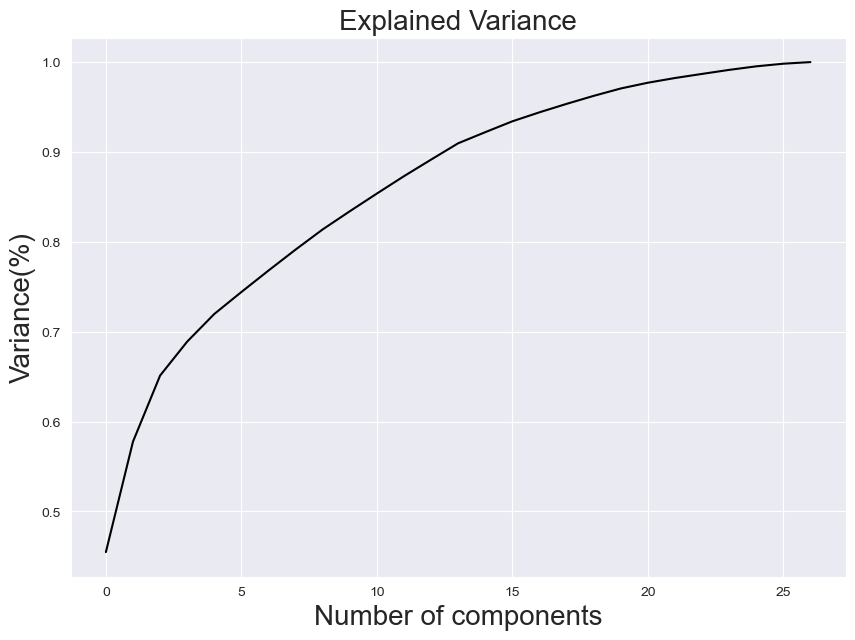

In [100]:
# Getting the optimal value of PCA
from sklearn.decomposition import PCA

# Object creation
pca = PCA()

principlecomponent = pca.fit_transform(df)
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='k')
plt.xlabel('Number of components',fontsize=20)
plt.ylabel('Variance(%)',fontsize=20) # for each componant
plt.title('Explained Variance',fontsize=20)
plt.show()


In [101]:
# Selecting the components
pca = PCA(n_components=25)
new_data = pca.fit_transform(df)
new_data

array([[-4.30189355, -1.75842176,  0.96511288, ..., -0.52894612,
         0.07931183, -0.2462028 ],
       [-4.24545067, -0.17415461,  1.71056803, ..., -0.81532012,
        -0.53351446, -0.61964109],
       [-4.27040046,  2.47284978,  3.93753578, ..., -0.28116336,
        -0.42590106,  0.74784098],
       ...,
       [-5.40455933, -1.49282851,  2.39636492, ..., -0.10174591,
         0.37466309,  1.11691656],
       [ 8.48802745, -1.7563539 ,  1.69979413, ...,  0.47196807,
         0.19115932, -0.50621339],
       [-4.18360335,  5.82669854, -2.39084993, ...,  0.61360551,
         0.06421594, -0.1284427 ]])

In [102]:
principle_df = pd.DataFrame(data=new_data,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10',
                            'pca11','pca12','pca13','pca14','pca15','pca16','pca17','pca18','pca19','pca20','pca21','pca22',
                            'pca23','pca24','pca25'])

# Add target veriable to preprocess dataframe for model building & evaluation
principle_df['PerformanceRating']=df.PerformanceRating

principle_df.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0 -4.301894 -1.758422  0.965113 -0.670906  0.931835 -1.306576 -0.225116   
1 -4.245451 -0.174155  1.710568 -1.008805  1.306453  0.789213 -1.112433   
2 -4.270400  2.472850  3.937536  0.194646  0.099604 -1.392802 -1.262468   
3  1.009680  0.865127  3.462927 -1.549061  2.719631  0.942036  2.570056   
4 -4.121187  5.842288 -0.548450 -1.609839  0.007816  2.887167  0.121171   

       pca8      pca9     pca10     pca11     pca12     pca13     pca14  \
0  0.486909 -1.484700  0.855113 -0.690269 -1.236009 -0.207704 -0.318093   
1  1.288275  0.281131  1.307010 -0.429028 -0.657751 -1.654003 -0.646988   
2 -0.816517  1.328824  1.754664  1.003573  0.516682 -0.800833 -2.139790   
3  0.786039 -0.494712 -1.179113 -0.053751 -0.387665  0.651140  0.230514   
4 -0.368012  0.010126  1.067085 -0.101252 -1.217017 -0.185027 -0.679421   

      pca15     pca16     pca17     pca18     pca19     pca20     pca21  \
0 -1.004833 -0.750924  0.514696  0.304462 -0.750727  0.106319  0.117981   
1 -0.781567 -0.792388  0.473232 -0.285477  0.410711 -0.742037 -0.455387   
2 -1.075021 -1.679975 -0.880298  0.722714  0.527314  0.357464 -0.202999   
3  0.931646  2.948749 -0.097760  0.676067 -1.361218  0.225569 -0.055077   
4  0.297122  0.078835  0.911708 -0.455176  0.948084 -0.963899  0.854028   

      pca22     pca23     pca24     pca25  PerformanceRating  
0 -0.175787 -0.528946  0.079312 -0.246203                  3  
1 -0.222538 -0.815320 -0.533514 -0.619641                  3  
2  0.402318 -0.281163 -0.425901  0.747841                  4  
3 -0.040857 -0.601118 -0.095976 -0.481624                  3  
4  0.135467 -0.297193  0.416163 -0.145805                  3

In [103]:
## Saving data

principle_df.to_csv('final_df.csv')


In [105]:
## Reading the data

data = pd.read_csv('final_df.csv')
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head(5)

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0 -4.301894 -1.758422  0.965113 -0.670906  0.931835 -1.306576 -0.225116   
1 -4.245451 -0.174155  1.710568 -1.008805  1.306453  0.789213 -1.112433   
2 -4.270400  2.472850  3.937536  0.194646  0.099604 -1.392802 -1.262468   
3  1.009680  0.865127  3.462927 -1.549061  2.719631  0.942036  2.570056   
4 -4.121187  5.842288 -0.548450 -1.609839  0.007816  2.887167  0.121171   

       pca8      pca9     pca10     pca11     pca12     pca13     pca14  \
0  0.486909 -1.484700  0.855113 -0.690269 -1.236009 -0.207704 -0.318093   
1  1.288275  0.281131  1.307010 -0.429028 -0.657751 -1.654003 -0.646988   
2 -0.816517  1.328824  1.754664  1.003573  0.516682 -0.800833 -2.139790   
3  0.786039 -0.494712 -1.179113 -0.053751 -0.387665  0.651140  0.230514   
4 -0.368012  0.010126  1.067085 -0.101252 -1.217017 -0.185027 -0.679421   

      pca15     pca16     pca17     pca18     pca19     pca20     pca21  \
0 -1.004833 -0.750924  0.514696  0.304462 -0.750727  0.106319  0.117981   
1 -0.781567 -0.792388  0.473232 -0.285477  0.410711 -0.742037 -0.455387   
2 -1.075021 -1.679975 -0.880298  0.722714  0.527314  0.357464 -0.202999   
3  0.931646  2.948749 -0.097760  0.676067 -1.361218  0.225569 -0.055077   
4  0.297122  0.078835  0.911708 -0.455176  0.948084 -0.963899  0.854028   

      pca22     pca23     pca24     pca25  PerformanceRating  
0 -0.175787 -0.528946  0.079312 -0.246203                  3  
1 -0.222538 -0.815320 -0.533514 -0.619641                  3  
2  0.402318 -0.281163 -0.425901  0.747841                  4  
3 -0.040857 -0.601118 -0.095976 -0.481624                  3  
4  0.135467 -0.297193  0.416163 -0.145805                  3

In [106]:
X = data.iloc[:,:-1]
y = data.PerformanceRating

In [107]:
X.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0 -4.301894 -1.758422  0.965113 -0.670906  0.931835 -1.306576 -0.225116   
1 -4.245451 -0.174155  1.710568 -1.008805  1.306453  0.789213 -1.112433   
2 -4.270400  2.472850  3.937536  0.194646  0.099604 -1.392802 -1.262468   
3  1.009680  0.865127  3.462927 -1.549061  2.719631  0.942036  2.570056   
4 -4.121187  5.842288 -0.548450 -1.609839  0.007816  2.887167  0.121171   

       pca8      pca9     pca10     pca11     pca12     pca13     pca14  \
0  0.486909 -1.484700  0.855113 -0.690269 -1.236009 -0.207704 -0.318093   
1  1.288275  0.281131  1.307010 -0.429028 -0.657751 -1.654003 -0.646988   
2 -0.816517  1.328824  1.754664  1.003573  0.516682 -0.800833 -2.139790   
3  0.786039 -0.494712 -1.179113 -0.053751 -0.387665  0.651140  0.230514   
4 -0.368012  0.010126  1.067085 -0.101252 -1.217017 -0.185027 -0.679421   

      pca15     pca16     pca17     pca18     pca19     pca20     pca21  \
0 -1.004833 -0.750924  0.514696  0.304462 -0.750727  0.106319  0.117981   
1 -0.781567 -0.792388  0.473232 -0.285477  0.410711 -0.742037 -0.455387   
2 -1.075021 -1.679975 -0.880298  0.722714  0.527314  0.357464 -0.202999   
3  0.931646  2.948749 -0.097760  0.676067 -1.361218  0.225569 -0.055077   
4  0.297122  0.078835  0.911708 -0.455176  0.948084 -0.963899  0.854028   

      pca22     pca23     pca24     pca25  
0 -0.175787 -0.528946  0.079312 -0.246203  
1 -0.222538 -0.815320 -0.533514 -0.619641  
2  0.402318 -0.281163 -0.425901  0.747841  
3 -0.040857 -0.601118 -0.095976 -0.481624  
4  0.135467 -0.297193  0.416163 -0.145805

In [108]:
y.head()

0    3
1    3
2    4
3    3
4    3
Name: PerformanceRating, dtype: int64

#### Balancing the Target Feature

In [119]:
from collections import Counter
from imblearn.over_sampling import SMOTE #SMOTE(synthetic minority oversampling techinque)
sm = SMOTE() # obeject creation
print("unbalanced data   :  ",Counter(y))
X_sm,y_sm = sm.fit_resample(X,y)
print("balanced data:    :",Counter(y_sm))

unbalanced data   :   Counter({3: 874, 2: 194, 4: 132})
balanced data:    : Counter({3: 874, 4: 874, 2: 874})


## Splitting training and testing data

In [120]:
## creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm, y_sm,random_state=3)

In [122]:
# Check shape of train and test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1966, 25), (656, 25), (1966,), (656,))

## 1.SVM

In [123]:
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_train, y_train)

SVC()

In [124]:
# Predict output for X_test

y_hat=svclassifier.predict(X_test)

In [115]:
y_hat

array([3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 4, 3, 3, 2, 4, 3, 3, 3, 3,
       4, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 4, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 3, 4, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 4, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3,
       3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3], d

In [130]:
Y_train = svclassifier.predict(X_train)

In [131]:
acc=accuracy_score(y_train,Y_train)
acc

0.9674465920651069

In [126]:
## TESTING DATA ACCURACY
## evaluating the model created
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(y_test,y_hat)
acc

0.9496951219512195

In [125]:
# Calssification report measures the quality of predictions. True Positives, False Positives, True negatives and False Negatives 
# are used to predict the metrics of a classification report 

print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           2       0.96      0.98      0.97       221
           3       0.95      0.90      0.92       215
           4       0.94      0.97      0.96       220

    accuracy                           0.95       656
   macro avg       0.95      0.95      0.95       656
weighted avg       0.95      0.95      0.95       656



In [127]:
cm1=pd.crosstab(y_test,y_hat)
cm1

col_0                2    3    4
PerformanceRating               
2                  217    4    0
3                    9  193   13
4                    0    7  213

### HYPERPARAMTER TUNING

In [138]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,0.5,10,50,60,70,80],
             'gamma':[1,0.1,0.001,0.0001,0.00001],
             'random_state':(list(range(1,20)))}
model = SVC() # Object creation
grid = GridSearchCV(model,param_grid,refit=True,verbose=2,scoring='f1',cv=5)

# Step:10 fitting the model for grid search
grid.fit(X,y)

Fitting 5 folds for each of 665 candidates, totalling 3325 fits
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=4; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=4; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=4; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=0.1, gamma=1, random_state=4; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=4; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=5; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=5; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=0.1, gamma=1, random_state=5; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=5; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=5; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=6; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=0.1, gamma=1, random_state=6; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=6; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=6; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=6; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=0.1, gamma=1, random_state=7; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=7; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=7; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=7; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=0.1, gamma=1, random_state=7; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=8; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=8; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=8; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=0.1, gamma=1, random_state=8; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=8; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=9; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=9; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=0.1, gamma=1, random_state=9; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=9; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=9; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=10; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=0.1, gamma=1, random_state=10; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=10; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=10; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=10; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=0.1, gamma=1, random_state=11; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=11; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=11; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=11; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=0.1, gamma=1, random_state=11; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=12; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=12; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=12; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=0.1, gamma=1, random_state=12; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=12; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=13; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=13; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=0.1, gamma=1, random_state=13; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=13; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=13; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=14; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=0.1, gamma=1, random_state=14; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=14; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=14; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=14; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=0.1, gamma=1, random_state=15; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=15; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=15; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=15; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=0.1, gamma=1, random_state=15; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=16; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=16; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=16; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=0.1, gamma=1, random_state=16; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=16; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=17; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=17; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=0.1, gamma=1, random_state=17; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=17; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=17; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=18; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=0.1, gamma=1, random_state=18; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=18; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=18; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=18; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=0.1, gamma=1, random_state=19; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=19; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=19; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=19; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=0.1, gamma=1, random_state=19; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=1; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=0.1, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=5; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=0.1, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=6; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=0.1, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=7; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=0.1, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=8; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=0.1, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=9; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=0.1, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=10; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=0.1, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=11; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=0.1, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=12; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=0.1, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=13; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=0.1, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=14; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=0.1, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=15; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=0.1, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=16; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=0.1, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=17; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=0.1, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=18; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=0.1, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=19; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=0.1, gamma=0.001, random_state=1; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=1; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=1; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=1; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=1; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=2; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=2; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=2; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=2; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=0.1, gamma=0.001, random_state=2; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=3; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=3; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=3; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=3; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=3; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=4; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=4; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=4; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=0.1, gamma=0.001, random_state=4; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=4; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=6; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=6; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=6; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=0.1, gamma=0.001, random_state=6; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=6; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=10; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=0.1, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=11; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=11; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=11; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=11; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=11; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=12; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=12; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=0.1, gamma=0.001, random_state=12; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=12; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=12; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=13; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=13; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=13; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=13; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=13; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=14; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=14; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=0.1, gamma=0.001, random_state=14; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=14; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=14; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=15; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=15; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=15; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=15; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=15; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=16; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=0.1, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=18; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=0.1, gamma=0.001, random_state=18; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=18; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=18; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=18; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=19; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=0.1, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=2; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=0.1, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=4; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=0.1, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=6; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=0.1, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=0.1, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=9; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=0.1, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=11; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...............C=0.1, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=13; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...............C=0.1, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=15; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...............C=0.1, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=17; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...............C=0.1, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=19; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...............C=0.1, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=2; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=0.1, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=4; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=0.1, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=6; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=0.1, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=9; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=0.1, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=11; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=0.1, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=13; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=0.1, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=15; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=0.1, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=17; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=0.1, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=19; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=0.1, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=1; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=0.5, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=2; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=0.5, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=3; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=0.5, gamma=1, random_state=3; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=3; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=3; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=3; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=0.5, gamma=1, random_state=4; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=4; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=4; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=4; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=0.5, gamma=1, random_state=4; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=5; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=5; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=5; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=0.5, gamma=1, random_state=5; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=5; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=6; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=6; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=0.5, gamma=1, random_state=6; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=6; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=6; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=7; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=0.5, gamma=1, random_state=7; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=7; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=7; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=7; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=0.5, gamma=1, random_state=8; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=8; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=8; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=8; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=0.5, gamma=1, random_state=8; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=9; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=9; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=9; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=0.5, gamma=1, random_state=9; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=9; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=10; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=10; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=0.5, gamma=1, random_state=10; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=10; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=10; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=11; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=0.5, gamma=1, random_state=11; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=11; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=11; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=11; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=0.5, gamma=1, random_state=12; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=12; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=12; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=12; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=0.5, gamma=1, random_state=12; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=13; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=13; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=13; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=0.5, gamma=1, random_state=13; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=13; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=14; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=14; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=0.5, gamma=1, random_state=14; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=14; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=14; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=15; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=0.5, gamma=1, random_state=15; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=15; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=15; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=15; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=0.5, gamma=1, random_state=16; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=16; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=16; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=16; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=0.5, gamma=1, random_state=16; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=17; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=17; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=17; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=0.5, gamma=1, random_state=17; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=17; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=18; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=18; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=0.5, gamma=1, random_state=18; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=18; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=18; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=19; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=0.5, gamma=1, random_state=19; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=19; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=19; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=19; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=0.5, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=1; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=0.5, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=2; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=0.5, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=3; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=0.5, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=4; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=0.5, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=5; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=0.5, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=6; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=0.5, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=7; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=0.5, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=8; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=0.5, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=9; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=0.5, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=10; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=0.5, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=11; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=0.5, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=12; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=0.5, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=13; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=0.5, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=14; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=0.5, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=15; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=0.5, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=16; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=0.5, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=17; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=0.5, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=18; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=0.5, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=19; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=0.5, gamma=0.1, random_state=19; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=1; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=1; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=1; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=1; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=1; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=2; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=2; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=2; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=2; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=0.5, gamma=0.001, random_state=2; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=3; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=3; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=3; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=3; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=3; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=4; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=4; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=4; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=0.5, gamma=0.001, random_state=4; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=4; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=6; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=6; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=6; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=0.5, gamma=0.001, random_state=6; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=6; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=8; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=0.5, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.5, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=10; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=0.5, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=11; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=11; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=11; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=11; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=11; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=12; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=0.5, gamma=0.001, random_state=12; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=12; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=12; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=12; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=13; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=13; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=13; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=13; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=13; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=14; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=0.5, gamma=0.001, random_state=14; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=14; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=14; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=14; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=15; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=15; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=15; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=15; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=15; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=0.5, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=17; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=0.5, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=18; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=18; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=18; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=18; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=18; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=0.5, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=1; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=0.5, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=2; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=0.5, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=3; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=0.5, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=5; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=0.5, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=6; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=0.5, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=8; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=0.5, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ................C=0.5, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=10; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...............C=0.5, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=11; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...............C=0.5, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=13; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...............C=0.5, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=14; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...............C=0.5, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=16; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...............C=0.5, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=17; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...............C=0.5, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=19; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...............C=0.5, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=1; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=0.5, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=3; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=0.5, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=4; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=0.5, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=6; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=0.5, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=7; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=0.5, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=9; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=0.5, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END .................C=0.5, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=10; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=0.5, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=12; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=0.5, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=14; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=0.5, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=15; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=0.5, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=17; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=0.5, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=18; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=0.5, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=19; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=10, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=1; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=10, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=2; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=10, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=3; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=10, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=3; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=10, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=4; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=10, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=4; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=10, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=5; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=10, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=6; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=10, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=7; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=10, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=8; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=10, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=8; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=10, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=9; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=10, gamma=1, random_state=9; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=10; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=10, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=11; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=10, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=12; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=10, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=12; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=10, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=13; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=10, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=14; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=10, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=15; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=10, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=16; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=10, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=16; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=10, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=17; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=10, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=18; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=10, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=19; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=10, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=19; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=1; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=10, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=1; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=10, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=2; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=10, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=3; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=10, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=3; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=10, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=4; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=10, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=5; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=10, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=6; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=10, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=6; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=10, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=7; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=10, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=8; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=10, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=9; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=10, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=9; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=10, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=10; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=10, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=11; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=10, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=11; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=10, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=12; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=10, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=13; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=10, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=13; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=10, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=14; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=10, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=14; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=10, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=15; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=10, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=16; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=10, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=17; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=10, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=18; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=10, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=18; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=10, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=19; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=10, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=2; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=10, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=4; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=10, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=6; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=10, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=10; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=10, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=12; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=10, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=14; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=10, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=16; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=10, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=18; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=10, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=1; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=10, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=10, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=4; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=10, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=6; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=10, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=7; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=10, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=9; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=10, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=11; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=10, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=13; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=10, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=15; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=10, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=17; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=10, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=18; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=10, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=1; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=10, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=3; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=10, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=4; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=10, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=6; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=10, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=8; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=10, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=9; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=10, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=11; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=10, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=13; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=10, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=14; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=10, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=16; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=10, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=17; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=10, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=19; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=10, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END .................C=10, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=1; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=50, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=2; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=50, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=2; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=50, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=3; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=50, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=5; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=50, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=5; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=50, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=6; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=50, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=7; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=50, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=8; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=50, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=9; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=50, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=9; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=50, gamma=1, random_state=9; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=10; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=50, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=11; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=50, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=11; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=50, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=12; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=50, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=13; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=50, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=13; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=50, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=14; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=50, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=15; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=50, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=16; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=50, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=17; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=50, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=17; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=50, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=18; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=50, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=19; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=50, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=19; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=1; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=50, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=2; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=50, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=3; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=50, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=3; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=50, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=4; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=50, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=5; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=50, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=6; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=50, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=7; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=50, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=7; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=50, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=8; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=50, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=9; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=50, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=9; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=50, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=10; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=50, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=11; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=50, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=12; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=50, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=13; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=50, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=13; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=50, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=14; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=50, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=15; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=50, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=16; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=50, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=17; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=50, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=17; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=50, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=18; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=50, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=19; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=50, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=1; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=50, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=2; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=50, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=4; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=50, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=6; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=50, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=8; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=50, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=10; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=50, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=12; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=50, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=14; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=50, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=16; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=50, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=18; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=50, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=1; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=50, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=2; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=50, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=4; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=50, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=6; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=50, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=8; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=50, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=10; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=50, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=11; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=50, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=13; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=50, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=14; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=50, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=16; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=50, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=18; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=50, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=1; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=50, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=3; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=50, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=5; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=50, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=7; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=50, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=8; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=50, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=10; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=50, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=12; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=50, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=14; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=50, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=15; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=50, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=16; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=50, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=18; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=50, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=19; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=60, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=1; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=60, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=2; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=60, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=2; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=60, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=3; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=60, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=4; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=60, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=5; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=60, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=5; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=60, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=6; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=60, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=7; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=60, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=8; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=60, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=8; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=60, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=9; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=60, gamma=1, random_state=9; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=10; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=60, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=11; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=60, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=12; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=60, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=12; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=60, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=13; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=60, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=14; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=60, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=14; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=60, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=15; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=60, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=16; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=60, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=17; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=60, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=18; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=60, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=18; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=60, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=19; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=60, gamma=1, random_state=19; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=1; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=60, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=2; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=60, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=3; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=60, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=3; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=60, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=4; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=60, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=5; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=60, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=6; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=60, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=7; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=60, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=7; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=60, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=8; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=60, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=8; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=60, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=9; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=60, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=10; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=60, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=11; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=60, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=11; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=60, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=12; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=60, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=13; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=60, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=13; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=60, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=14; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=60, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=15; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=60, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=16; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=60, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=17; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=60, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=18; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=60, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=18; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=60, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=19; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=60, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=2; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=60, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=4; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=60, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=7; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=60, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=9; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=60, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=11; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=60, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=13; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=60, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=15; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=60, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=17; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=60, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=18; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=60, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=1; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=60, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=2; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=60, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=4; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=60, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=5; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=60, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=7; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=60, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=8; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=60, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=10; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=60, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=12; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=60, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=14; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=60, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=16; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=60, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=17; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=60, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=19; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=60, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=2; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=60, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=4; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=60, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=6; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=60, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=7; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=60, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=9; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=60, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=11; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=60, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=12; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=60, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=14; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=60, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=16; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=60, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=17; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=60, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=19; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=60, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=1; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=70, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=2; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=70, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=3; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=70, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=3; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=70, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=4; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=70, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=4; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=70, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=5; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=70, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=6; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=70, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=6; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=70, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=7; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=70, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=8; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=70, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=8; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=70, gamma=1, random_state=9; total time=   0.1s
[CV] END ......................C=70, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=9; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=70, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=9; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=10; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=70, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=10; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=70, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=11; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=70, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=12; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=70, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=13; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=70, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=13; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=70, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=14; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=70, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=15; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=70, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=16; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=70, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=17; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=70, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=17; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=70, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=18; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=70, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=18; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=70, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=19; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=70, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=19; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=1; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=70, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=2; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=70, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=2; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=70, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=3; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=70, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=4; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=70, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=5; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=70, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=6; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=70, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=7; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=70, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=7; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=70, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=8; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=70, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=9; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=70, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=10; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=70, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=11; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=70, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=11; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=70, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=12; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=70, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=13; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=70, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=14; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=70, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=14; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=70, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=15; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=70, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=16; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=70, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=17; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=70, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=18; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=70, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=19; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=70, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=1; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=70, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=3; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=70, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=5; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=70, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=7; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=70, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=9; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=70, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=11; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=70, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=13; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=70, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=15; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=70, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=16; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=70, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=18; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=70, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=1; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=70, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=3; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=70, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=5; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=70, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=7; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=70, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=9; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=70, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=10; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=70, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=12; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=70, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=13; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=70, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=15; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=70, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=17; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=70, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=18; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=70, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=1; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=70, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=3; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=70, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=4; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=70, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=6; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=70, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=7; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=70, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=9; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=70, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=11; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=70, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=13; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=70, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=15; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=70, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=16; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=70, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=18; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=70, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=19; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=80, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=80, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=80, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=80, gamma=1, random_state=1; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=80, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=80, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=80, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=80, gamma=1, random_state=2; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=80, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=80, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=80, gamma=1, random_state=3; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=80, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=80, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=80, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=80, gamma=1, random_state=3; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=80, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=80, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=80, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=80, gamma=1, random_state=4; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=80, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=80, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=80, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=80, gamma=1, random_state=5; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=80, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=80, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=80, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=80, gamma=1, random_state=6; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=80, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=80, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=80, gamma=1, random_state=6; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=80, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=80, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=80, gamma=1, random_state=7; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=80, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=80, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=80, gamma=1, random_state=8; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=80, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=80, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=80, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=80, gamma=1, random_state=8; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=80, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=80, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=80, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=80, gamma=1, random_state=9; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ......................C=80, gamma=1, random_state=9; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=10; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=80, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=11; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=80, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=11; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=80, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=12; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=80, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=12; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=80, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=13; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=80, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=14; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=80, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=15; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=80, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=15; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=80, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=16; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=80, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=17; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=80, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=17; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=80, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=18; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=80, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=19; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=80, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=19; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .....................C=80, gamma=1, random_state=19; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=1; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=80, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=2; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=80, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=3; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=80, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=3; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=80, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=4; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=80, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=5; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=80, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=6; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=80, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=7; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=80, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=8; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=80, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=9; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ....................C=80, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=10; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=80, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=10; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=80, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=11; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=80, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=12; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=80, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=13; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=80, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=13; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=80, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=14; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=80, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=15; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=80, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=15; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=80, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=16; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=80, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=17; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=80, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=18; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=80, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=19; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ...................C=80, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=19; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=80, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=2; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=80, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=3; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=80, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=5; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=80, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=6; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=80, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=7; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=80, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=9; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=80, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=80, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=11; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=80, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=13; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=80, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=15; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=80, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=16; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=80, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=18; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=80, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=1; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=80, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=2; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=80, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=3; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=80, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=5; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=80, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=7; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=80, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=8; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=80, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=80, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=10; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=80, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=11; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=80, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=13; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=80, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=15; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=80, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=16; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=80, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=18; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=80, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=19; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ................C=80, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=1; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=80, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=3; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=80, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=4; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=80, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=6; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=80, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=7; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=80, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=9; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END ..................C=80, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END ..................C=80, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=11; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=80, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=12; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=80, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=14; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=80, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=15; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=80, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=17; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV] END .................C=80, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=19; total time=   0.0s


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 10, 50, 60, 70, 80],
                         'gamma': [1, 0.1, 0.001, 0.0001, 1e-05],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=2)

In [139]:
# set the best parameter 
clf =SVC(C=0.6,gamma=0.1,random_state=1)

# fit the model
clf.fit(X_train,y_train)

# Predict the x test
y_hat_clf = clf.predict(X_test)

In [140]:
test_accuracy = accuracy_score(y_hat_clf,y_test)
print("Testing accuracy of support vector classifier model",test_accuracy*100)
print("support vector classifier Classification report: \n",classification_report(y_hat_clf,y_test))

Testing accuracy of support vector classifier model 97.86585365853658
support vector classifier Classification report: 
               precision    recall  f1-score   support

           2       0.98      0.99      0.98       219
           3       0.98      0.96      0.97       219
           4       0.98      0.99      0.99       218

    accuracy                           0.98       656
   macro avg       0.98      0.98      0.98       656
weighted avg       0.98      0.98      0.98       656



- After hyperparameter tuning it has lead to overfitting 

## 2.RANDOM FOREST

In [132]:
# importing libary and creating object
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100) # 100 decision tree

# fitting training data
rf.fit(X_train,y_train)

# Prediction on testing data
rf_test_predict = rf.predict(X_test)

# Prediction on training data
rf_train_predict = rf.predict(X_train)

In [133]:
## TRAINING ACCURACY

rf_train_accuracy = accuracy_score(rf_train_predict,y_train)
print("Training accuracy of random forest",rf_train_accuracy)
print("Classification report of training: \n",classification_report(rf_train_predict,y_train))

Training accuracy of random forest 1.0
Classification report of training: 
               precision    recall  f1-score   support

           2       1.00      1.00      1.00       653
           3       1.00      1.00      1.00       659
           4       1.00      1.00      1.00       654

    accuracy                           1.00      1966
   macro avg       1.00      1.00      1.00      1966
weighted avg       1.00      1.00      1.00      1966



In [134]:
## TESTING ACCURACY

rf_test_accuracy = accuracy_score(rf_test_predict,y_test)
print("Testing accuracy of random forest",rf_test_accuracy*100)
print("Classification report of testing: \n",classification_report(rf_test_predict,y_test))

Testing accuracy of random forest 95.27439024390245
Classification report of testing: 
               precision    recall  f1-score   support

           2       0.97      0.94      0.96       228
           3       0.91      0.95      0.93       206
           4       0.98      0.97      0.97       222

    accuracy                           0.95       656
   macro avg       0.95      0.95      0.95       656
weighted avg       0.95      0.95      0.95       656



In [148]:
pd.crosstab(rf_test_predict,y_test)

PerformanceRating    2    3    4
row_0                           
2                  215   13    0
3                    6  195    5
4                    0    7  215

### HYPERPARAMETER TUNING 

In [135]:
# import library and imputation of parameter
from sklearn.model_selection import RandomizedSearchCV  
#In random forest we are not used grid search CV because of memory reason.

n_estimators = [int(x) for x in np.linspace(start=100 ,stop=2000, num=10)] #No of decision tree in forest
max_features = ['auto', 'sqrt'] #Max no of feature consider to create decision tree
max_depth    = [int(x) for x in np.linspace(10,100,num=11)] #Max no of level in each decision tree
max_depth.append(None)
min_samples_split = [2,3,5,8] #Min number of data points placed in a node before the node is split
min_samples_leaf  = [1,2,3,4]  #Min number of data point allowed in leaf node

# Creating dictionary of paramter
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Object creation
rf_clf = RandomForestClassifier(random_state=42) #Provide random state because select rows and columns randomly

# Create Random search CV with parameter
rf_cv = RandomizedSearchCV(estimator=rf_clf,scoring='f1',param_distributions=random_grid,
                           n_iter=10,cv=2,verbose=2,random_state=1,n_jobs=-1)

# Fitting the training data
rf_cv.fit(X_train,y_train)

# Get best parameter
rf_best_params = rf_cv.best_params_
print(f"Best parameter: {rf_best_params}")

Fitting 2 folds for each of 10 candidates, totalling 20 fits


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameter: {'n_estimators': 311, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 37}


In [136]:
# Create object and place the best paramter
rf_clf1 = RandomForestClassifier(**rf_best_params)

# Fitting the training data
rf_clf1.fit(X_train,y_train)

# Prediction on test data
rf_clf1_predict = rf_clf1.predict(X_test)

In [137]:
rf_accuracy = accuracy_score(rf_clf1_predict,y_test)
print("Accuracy after hyperparameter tunning",rf_accuracy*100)
print("Classification report: \n",classification_report(rf_clf1_predict,y_test))

Accuracy after hyperparameter tunning 93.75
Classification report: 
               precision    recall  f1-score   support

           2       0.96      0.93      0.95       227
           3       0.89      0.91      0.90       210
           4       0.96      0.96      0.96       219

    accuracy                           0.94       656
   macro avg       0.94      0.94      0.94       656
weighted avg       0.94      0.94      0.94       656



- After hyperparameter tuning socre has not increased

## ARTIFICIAL NEURAL NETWORK [MLP CLASSIFIER]

In [142]:
# Importing library and object creation
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(60,3),
                      learning_rate='constant',
                      max_iter=250,
                      random_state=42)


In [143]:
# Fitting the training data
model.fit(X_train,y_train)

C:\Users\sahir\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(60, 3), max_iter=250, random_state=42)

In [144]:
# Predicting the probability
mlp_prdict_probability = model.predict_proba(X_test)
mlp_prdict_probability

array([[7.05420223e-07, 9.99739629e-01, 2.59665248e-04],
       [3.76177351e-08, 9.99997649e-01, 2.31363740e-06],
       [1.08346624e-17, 3.79684094e-07, 9.99999620e-01],
       ...,
       [4.95857022e-04, 9.96225461e-01, 3.27868150e-03],
       [9.99805563e-01, 1.94436800e-04, 2.12656645e-12],
       [1.55406205e-13, 2.80781782e-05, 9.99971922e-01]])

In [145]:
# Prediction on test data
mlp_test_predict = model.predict(X_test)

# Prediction on training data
mlp_train_predict = model.predict(X_train)

In [149]:
## TRAINING ACCURACY

mlp_train_accuracy = accuracy_score(mlp_train_predict,y_train)
print("Training accuracy of MLP model is:",mlp_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(mlp_train_predict,y_train))


Training accuracy of MLP model is: 99.69481180061037
Classification report of training:
               precision    recall  f1-score   support

           2       1.00      0.99      1.00       658
           3       0.99      1.00      1.00       653
           4       1.00      1.00      1.00       655

    accuracy                           1.00      1966
   macro avg       1.00      1.00      1.00      1966
weighted avg       1.00      1.00      1.00      1966



In [146]:
## TESTING ACCURACY

mlp_test_accuracy = accuracy_score(mlp_test_predict,y_test)
print("Testing accuracy of MLP model is:",mlp_test_accuracy*100)
print("Classification report of testing:"'\n',classification_report(mlp_test_predict,y_test))

Testing accuracy of MLP model is: 96.4939024390244
Classification report of testing:
               precision    recall  f1-score   support

           2       0.98      0.98      0.98       222
           3       0.93      0.96      0.95       208
           4       0.98      0.96      0.97       226

    accuracy                           0.96       656
   macro avg       0.96      0.96      0.96       656
weighted avg       0.97      0.96      0.97       656



- ANN performs well on the data

In [147]:
pd.crosstab(mlp_test_predict,y_test)

PerformanceRating    2    3    4
row_0                           
2                  217    5    0
3                    4  200    4
4                    0   10  216

## TOP 3 FACTORS AFFECTING THE EMPLOYEE PERFORMANCE

### From the above analysis top 3 factors affecting the employee performance is:

1. Emp environment satisfaction
2. Emp last salary hike percent
3. Emp work life balance

## Recommendation to improve Employee Performance:

### Based on the insights gained from the analysis, here are some recommendations to improve employee performance:

1. Focus on improving job satisfaction: Since higher job satisfaction is correlated with better performance ratings, organizations should prioritize initiatives aimed at enhancing employee satisfaction. This can include creating a positive work environment, providing opportunities for growth and development, recognizing and rewarding employee achievements, and promoting work-life balance.

2. Enhance employee engagement: Increasing employee engagement can lead to improved performance. Organizations can achieve this by fostering open communication, involving employees in decision-making processes, providing clear goals and expectations, and offering opportunities for skill development and career advancement.

3. Address work-life balance concerns: Work-life balance has been found to have a significant impact on performance ratings. Organizations should support employees in achieving a healthy work-life balance by promoting flexible work arrangements, offering employee assistance programs, and encouraging managers to prioritize work-life balance for their team members.

4. Provide training and development opportunities: Employees with higher job involvement tend to have better performance ratings. Organizations should invest in training and development programs to enhance employee skills and job involvement. This can include providing relevant workshops, seminars, online courses, mentoring programs, and cross-functional training opportunities.

5. Recognize and reward high performers: Identifying and acknowledging high-performing employees is crucial for maintaining motivation and encouraging continued excellence. Implementing a robust performance recognition and reward system can help boost employee morale and foster a culture of high performance.

6. Regular performance feedback and coaching: Establishing a culture of continuous feedback and coaching can contribute to improved performance. Managers should provide regular feedback, guidance, and support to employees, helping them identify areas for improvement and offering constructive suggestions to enhance their performance.

7. Foster collaboration and teamwork: Encouraging collaboration and teamwork can lead to synergistic outcomes and improved performance. Organizations should promote a collaborative work environment, foster cross-functional collaboration, and provide opportunities for team-building activities to enhance cooperation and collective performance.

8. Monitor and address department-specific issues: Analyzing department-wise performance can help identify specific areas where improvement is needed. Organizations should closely monitor departments or teams with consistently low performance ratings and take proactive measures to address any underlying issues, such as resource allocation, training needs, or process improvements.



#### Important Feature Selection
- PCA was applied to the dataset to reduce the dimensionality and extract the most important features. This technique allowed us to identify the key components that contribute the most to the overall variance in the data. By employing PCA, we were able to effectively summarize and visualize the data while retaining a significant portion of the original information. 

#### DIFFERENT METHODS USED:
1. Exploratory Data Analysis (EDA): This technique was employed to gain an initial understanding of the data, identify patterns, and detect outliers or missing values.

2. Feature Engineering: Various techniques were applied to create new features or transform existing ones to improve the predictive power of the models. This involved tasks such as scaling, encoding categorical variables

3. Data Preprocessing: Before training the models, data preprocessing techniques like handling missing values, handling outliers, and standardizing or normalizing the data were performed to ensure the data was suitable for analysis.

4. Machine Learning Algorithms: Different machine learning algorithms, such as Support Vector Machines (SVM), Random Forest, and Artificial Neural Networks (ANN), were implemented to build predictive models and make predictions based on the data.



####  RESULTS, ANALYSIS AND INSIGHTS:

1. In the analysis, several interesting relationships were discovered that do not fit into the sections above. For example, it was observed that employees with higher job satisfaction tended to have higher performance ratings. Additionally, employees in certain departments showed higher levels of job involvement, which correlated with higher performance ratings.

2. The most important technique used in this project included data preprocessing (handling missing values, outliers, etc.), feature engineering (transforming existing ones), and building predictive models using machine learning algorithms.

3. Further business insights gained from the analysis could include identifying key factors that influence employee attrition, understanding the relationship between years of experience and performance ratings, and identifying any specific departments or job roles that show consistent patterns of high or low performance. These insights can help organizations make informed decisions regarding talent management, employee development, and improving overall organizational performance.

## CONCLUSION
- The Support Vector Machine (SVM) model achieved a high accuracy of 96.74% on the training data, but its performance on the test data was slightly lower at 94.96%. After applying hyperparameter tuning, the model's performance improved to 97.86%, indicating a potential issue of overfitting.

- On the other hand, the Random Forest model initially achieved a perfect accuracy of 100% on the training data. However, its performance on the test data was 95.27%. After applying hyperparameter tuning, the model's performance decreased, suggesting that the initial accuracy was likely a result of overfitting.

- In comparison, the Artificial Neural Network (Multilayer Perceptron) model performed exceptionally well on the training data, with an accuracy of 99.69%. Its performance on the test data was also high at 96.49%.

- Considering the overall performance and generalization ability, we have decided to select the Artificial Neural Network (Multilayer Perceptron) model as the preferred choice.

## MODEL SAVING

In [150]:
# saving model with the help of pickle
import pickle

file = open('mlp_classifier_model.pkl','wb')
pickle.dump(model,file)